# **Micro Credit Project** 

## 1. Dataset loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/Data file.csv",index_col=[0])

In [ ]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [ ]:
df.shape

(209593, 36)

## **2.Checking basic details**

### Removing irrelavent columns

Age on cellular network cannot be in -ve so removing data having -ve 'aon' column

In [ ]:
df1 = df[df['aon'] >0 ]

In [ ]:
df=df1
df1.shape

(208054, 36)

In [ ]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

Since pcircle attribute has only one value 'UPW' for all rows we are removing that attribute from table

In [ ]:
df = df.drop(['pcircle'],axis=1)

In [ ]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

since mobile munber is not going to play a vital role in determination of loan pay back so removing 'msisdn'

In [ ]:
df = df.drop(['msisdn'],axis=1)

pdate is just the date of the record taken so removing that date also

In [ ]:
df = df.drop(['pdate'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208054 entries, 1 to 209593
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 208054 non-null  int64  
 1   aon                   208054 non-null  float64
 2   daily_decr30          208054 non-null  float64
 3   daily_decr90          208054 non-null  float64
 4   rental30              208054 non-null  float64
 5   rental90              208054 non-null  float64
 6   last_rech_date_ma     208054 non-null  float64
 7   last_rech_date_da     208054 non-null  float64
 8   last_rech_amt_ma      208054 non-null  int64  
 9   cnt_ma_rech30         208054 non-null  int64  
 10  fr_ma_rech30          208054 non-null  float64
 11  sumamnt_ma_rech30     208054 non-null  float64
 12  medianamnt_ma_rech30  208054 non-null  float64
 13  medianmarechprebal30  208054 non-null  float64
 14  cnt_ma_rech90         208054 non-null  int64  
 15  

In [ ]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000,208054.000000
mean,0.876619,8172.585764,5419.249418,6125.547000,2703.033034,3498.787539,3761.916846,3711.858532,2072.797019,3.998803,3744.617968,7752.414537,1819.741291,3856.339832,6.351236,7.724192,12476.857845,1871.663962,92.452337,263.174956,3752.368667,0.041787,0.046051,2.771891,18.039797,274.278347,0.053813,18.500427,23.775289,6.708335,0.045803,3.411772,4.341256
std,0.328875,75972.281723,9243.865536,10947.396954,4316.732294,5782.750615,53951.314159,53373.932507,2376.479309,4.264326,53702.130260,10161.002246,2075.997428,54046.887296,7.207273,12.566890,16893.279207,2086.687964,370.498594,4189.495846,53883.733151,0.398991,0.954890,2.559481,17.413684,4243.982654,0.217559,224.457555,26.524226,2.110677,0.200026,8.805682,10.310009
min,0.000000,1.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,250.000000,43.655750,43.872000,284.682500,305.640000,1.000000,0.000000,770.000000,1.000000,0.000000,1543.000000,770.000000,11.000000,2.000000,0.000000,2319.000000,773.000000,14.832500,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,532.000000,1505.623500,1532.540000,1091.080000,1344.405000,3.000000,0.000000,1539.000000,3.000000,2.000000,4633.000000,1539.000000,34.000000,4.000000,2.000000,7327.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,986.000000,7302.000000,7880.265000,3373.565000,4224.565000,7.000000,0.000000,2309.000000,5.000000,6.000000,10020.000000,1924.000000,83.500000,9.000000,8.000000,16117.500000,1924.000000,79.670000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [ ]:
print(df.isnull().sum())

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64


## **3.EDA**

### Univariant analysis

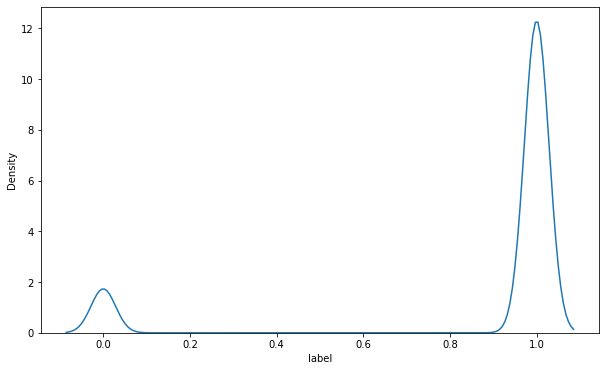

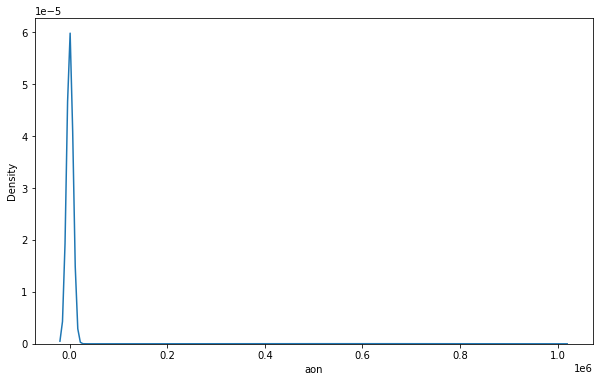

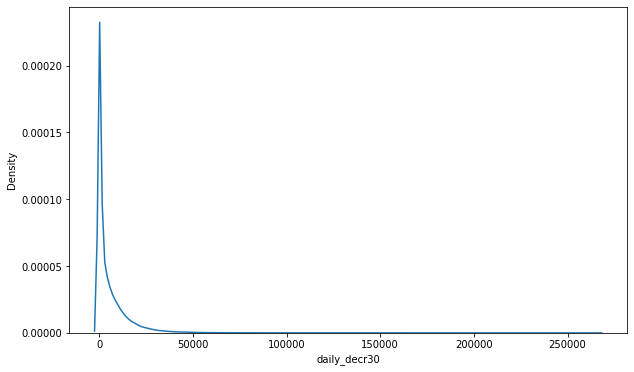

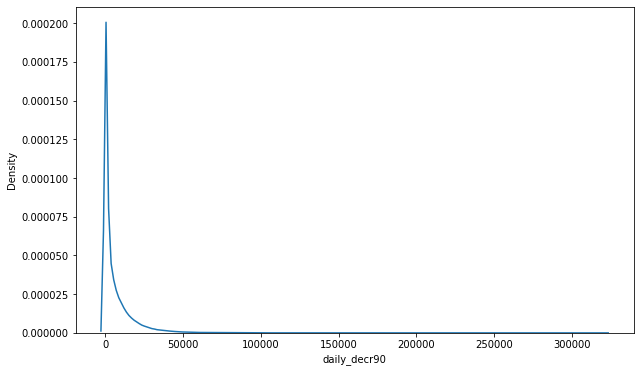

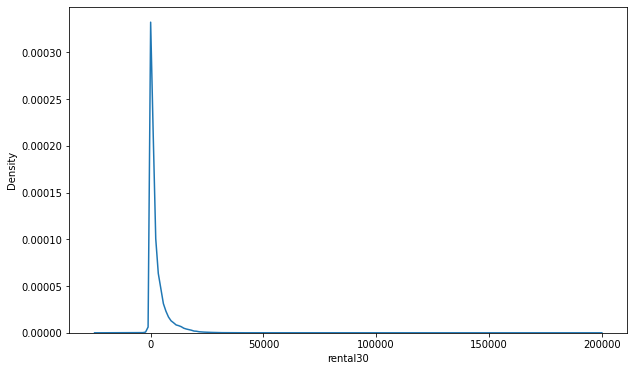

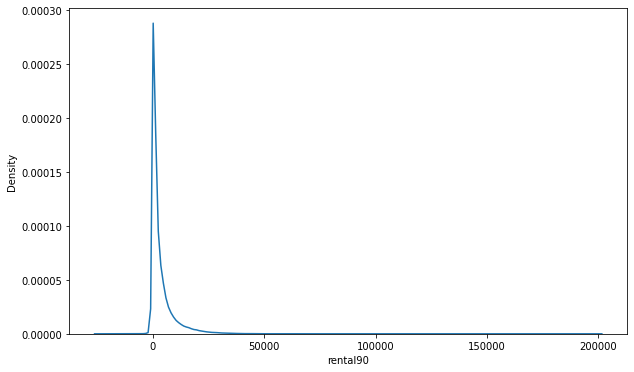

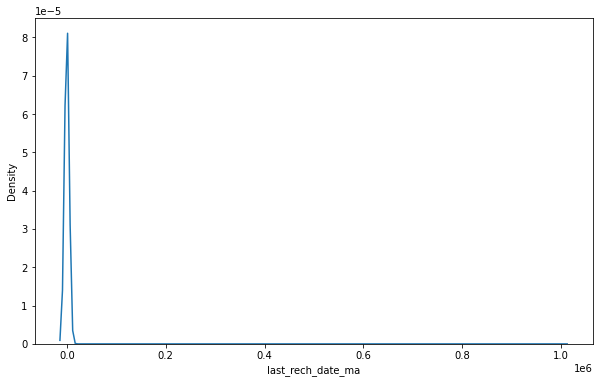

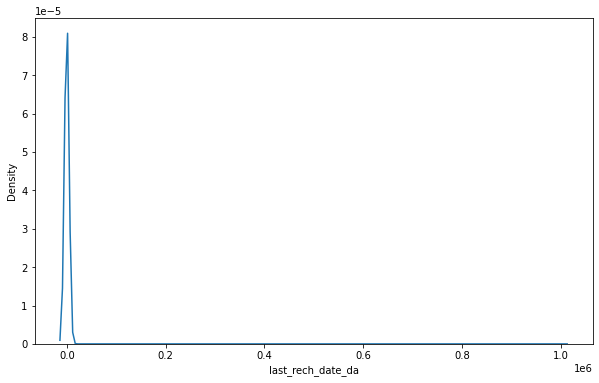

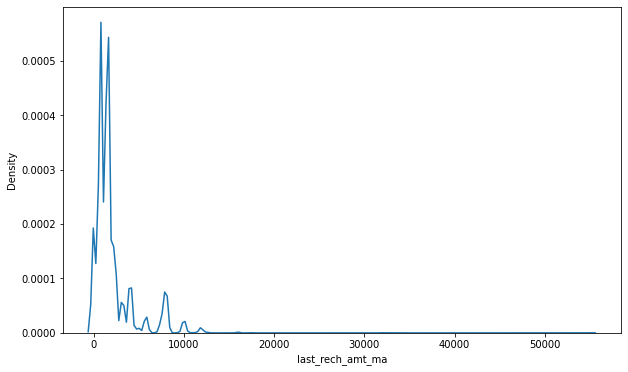

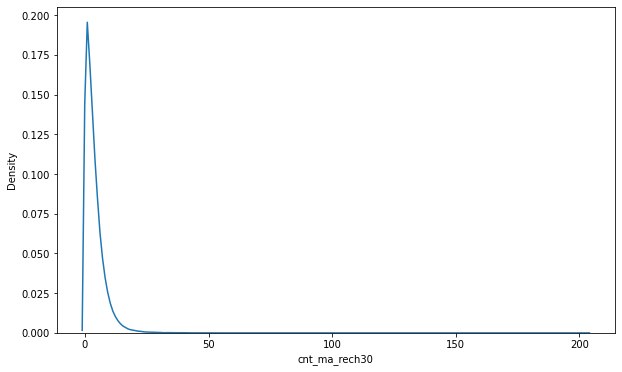

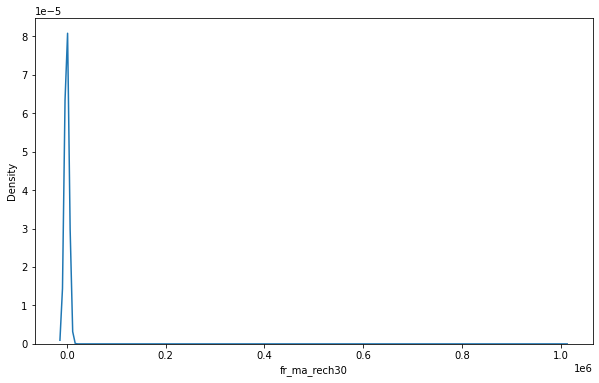

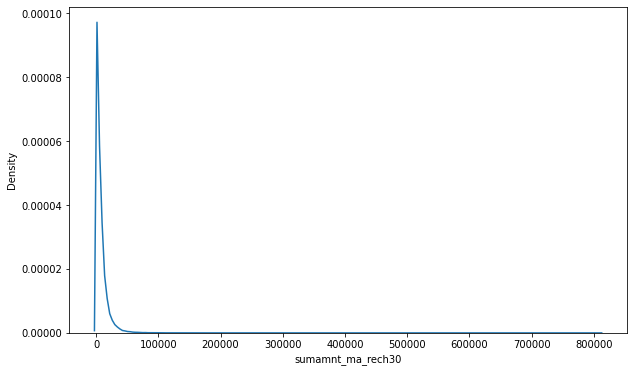

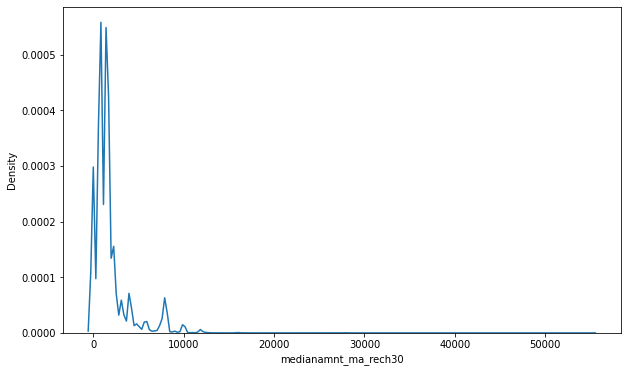

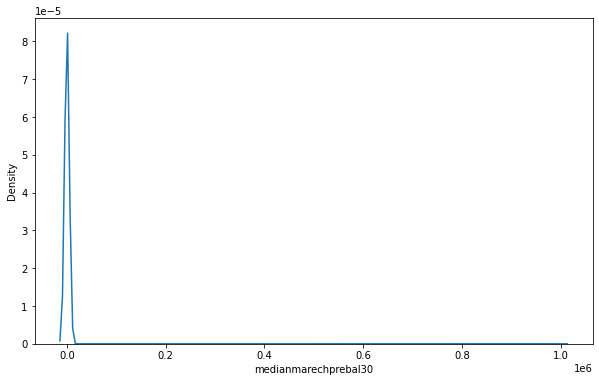

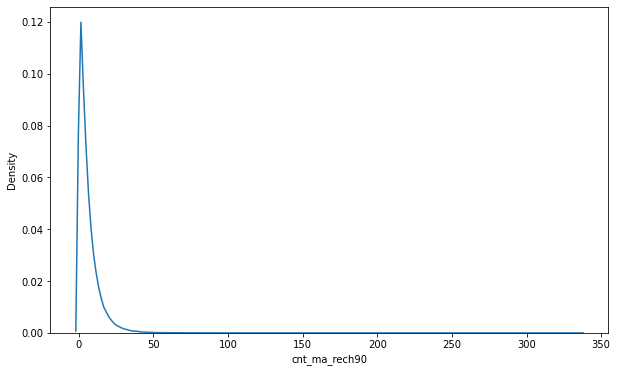

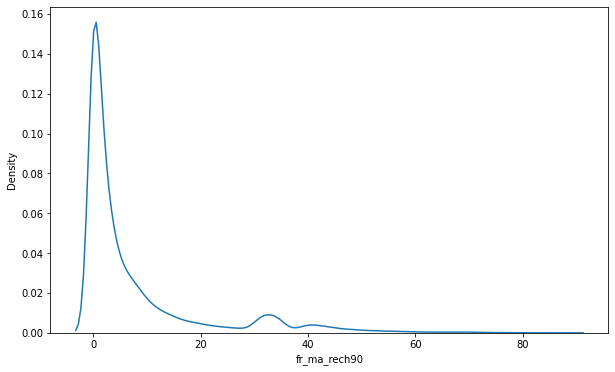

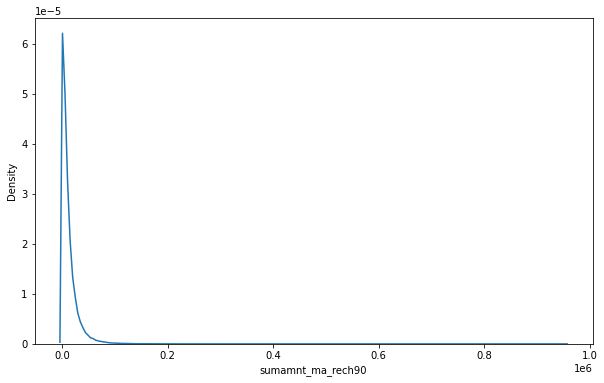

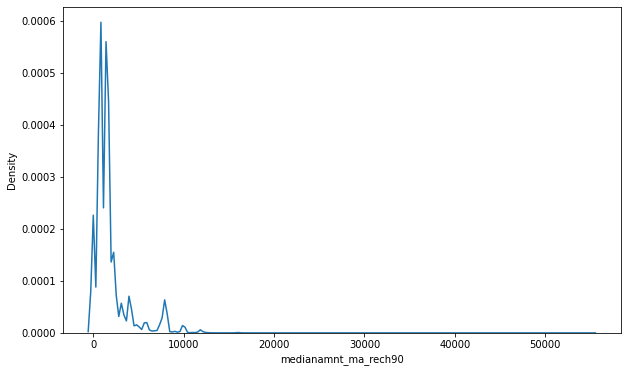

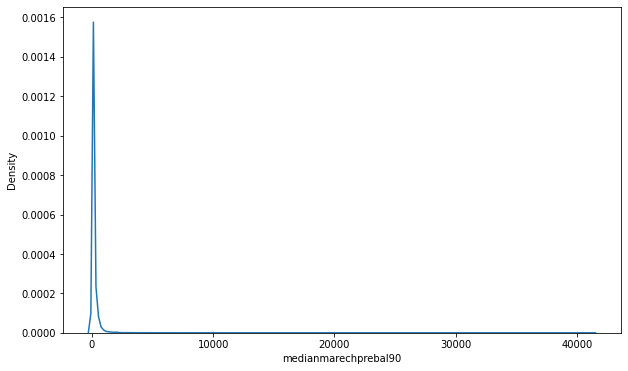

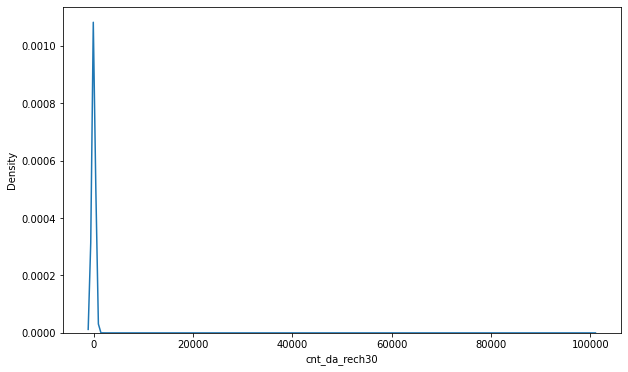

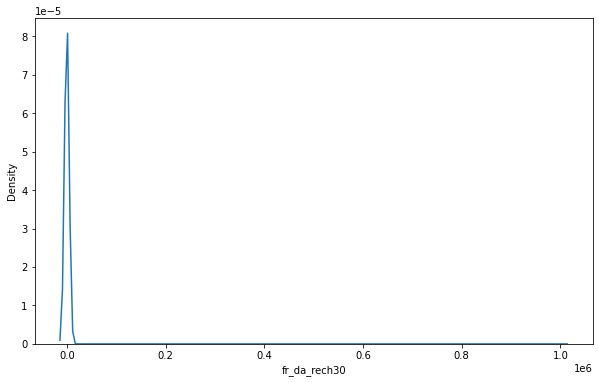

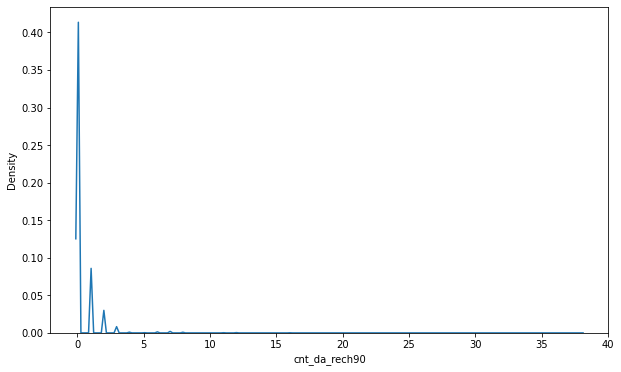

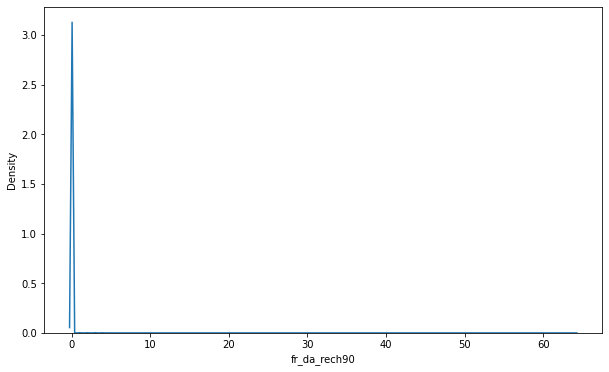

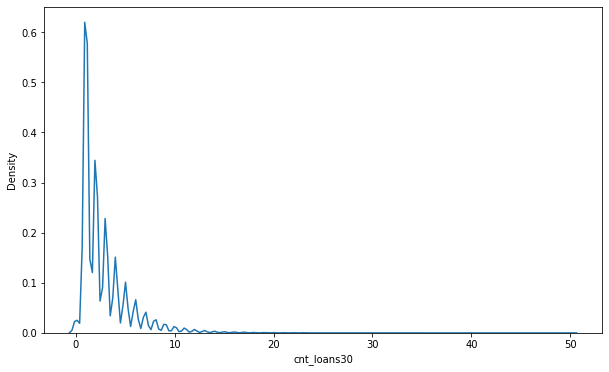

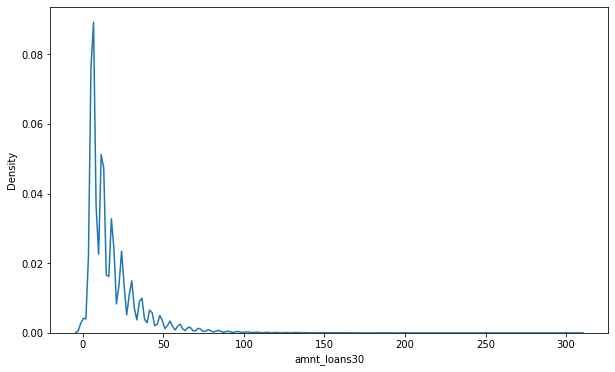

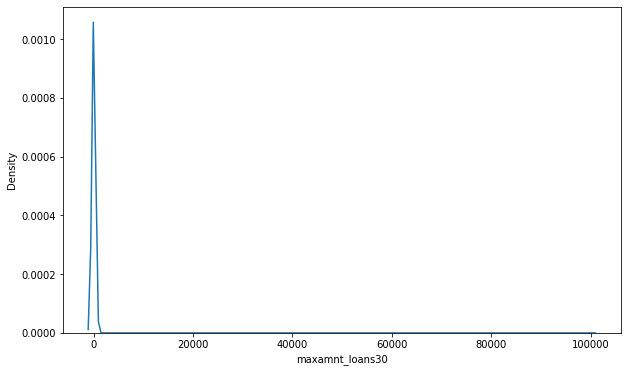

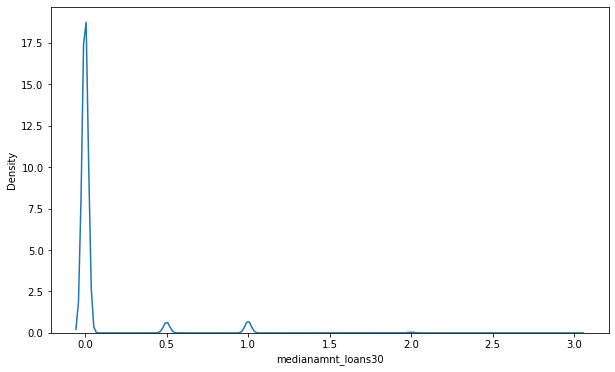

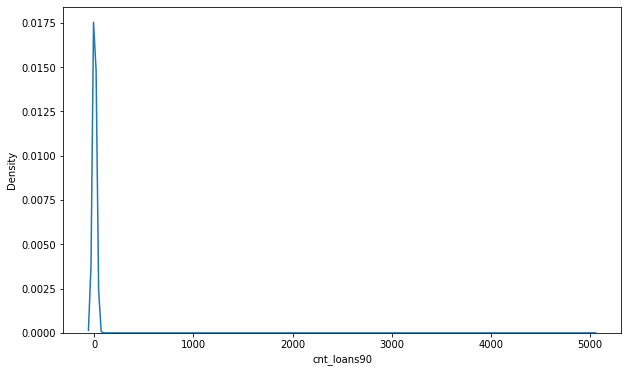

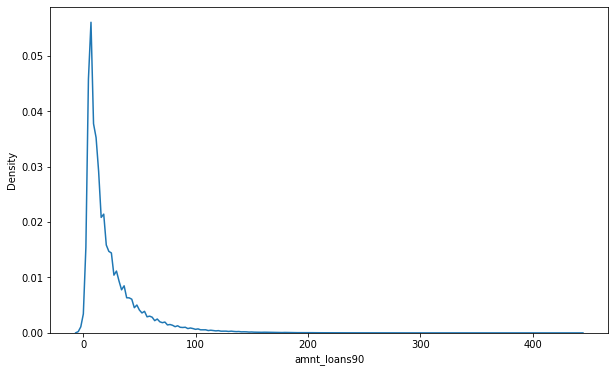

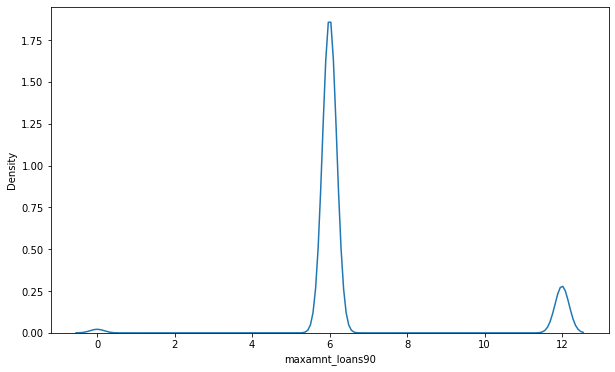

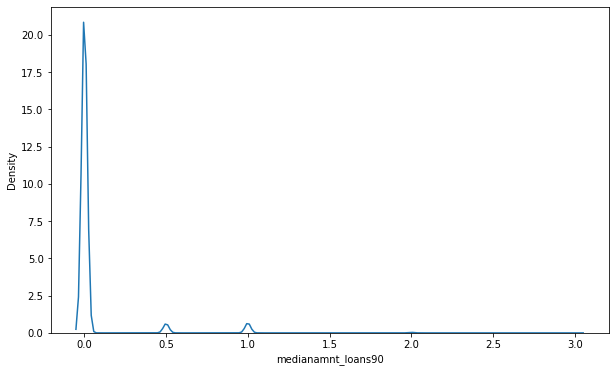

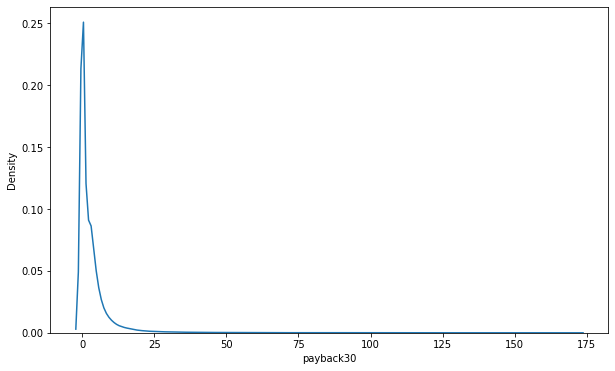

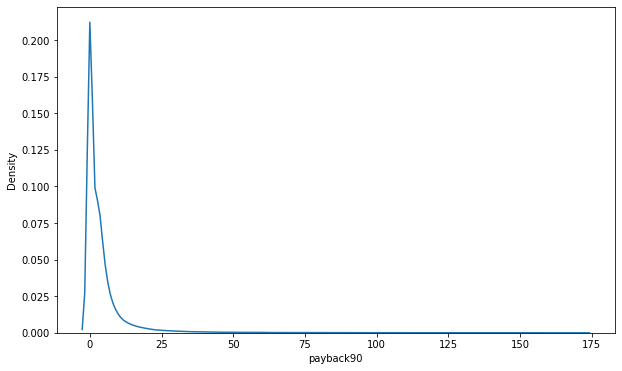

In [ ]:
for i in df.columns:
  plt.figure(figsize=[10,6])
  sns.kdeplot(df[i])

All the data tends to be skewed so need to balence the dataset.

In [ ]:
df['label'].describe()

count    208054.000000
mean          0.876619
std           0.328875
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [ ]:
print(df['label'].value_counts())

1.0    182384
0.0     25670
Name: label, dtype: int64


class imbalence need to be treated

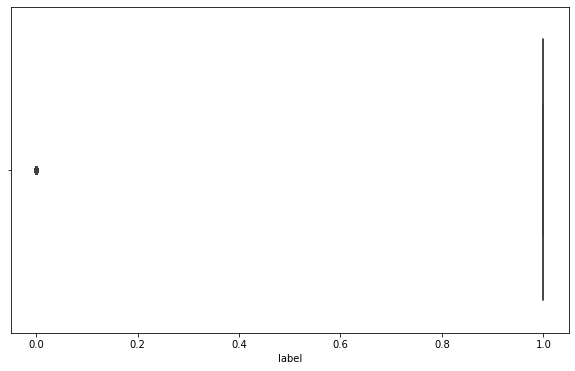

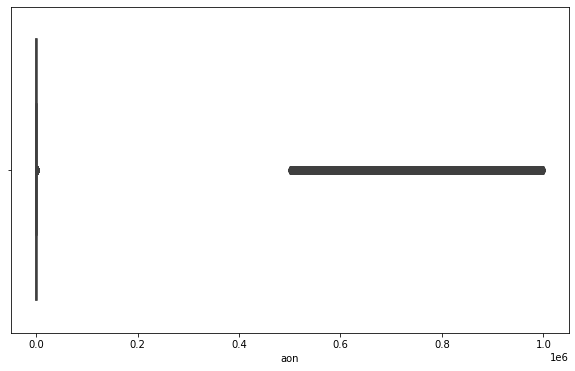

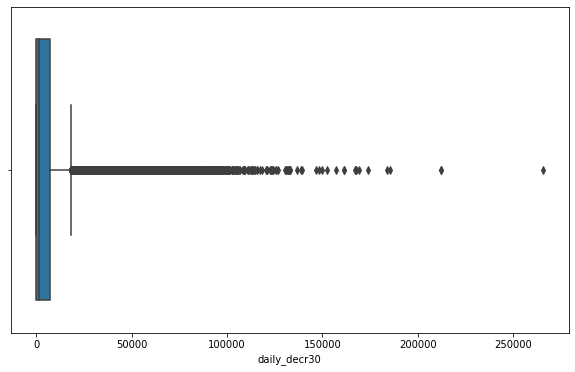

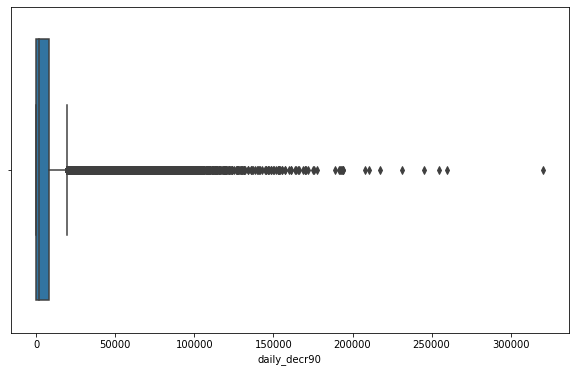

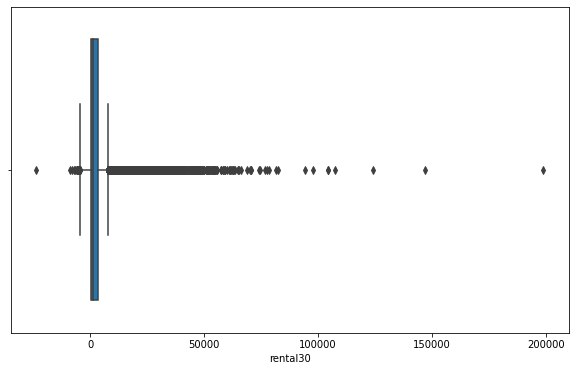

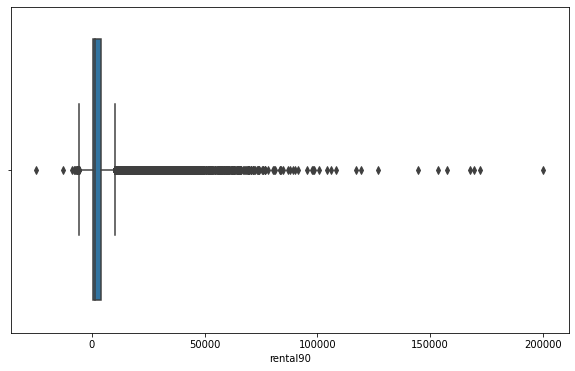

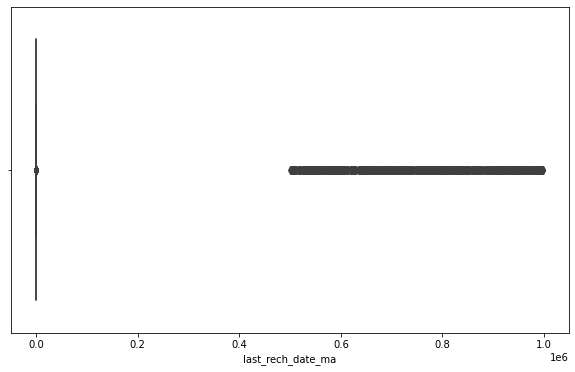

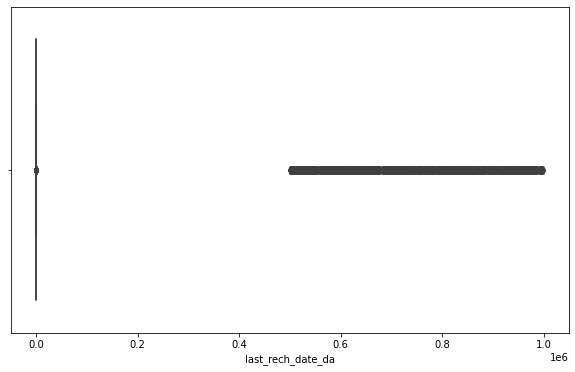

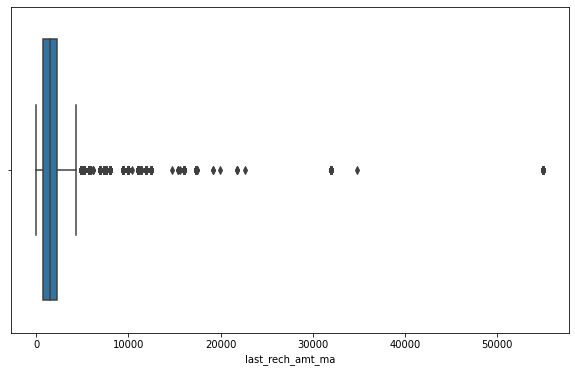

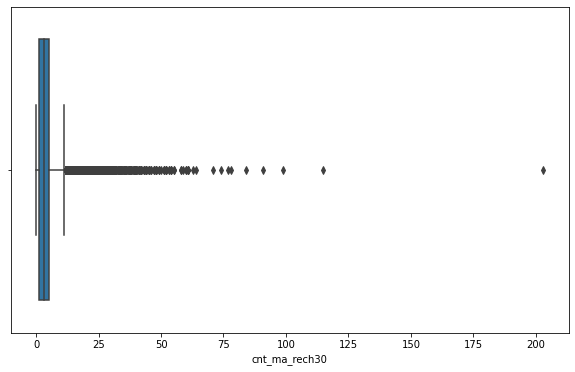

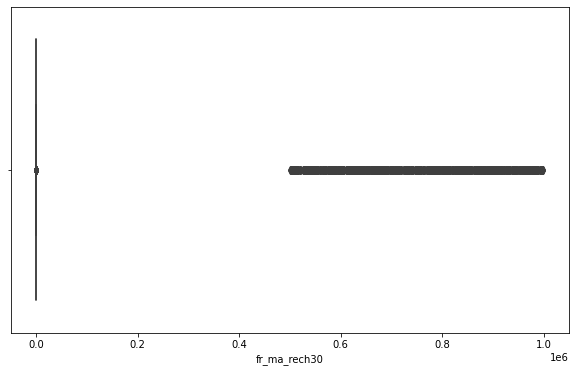

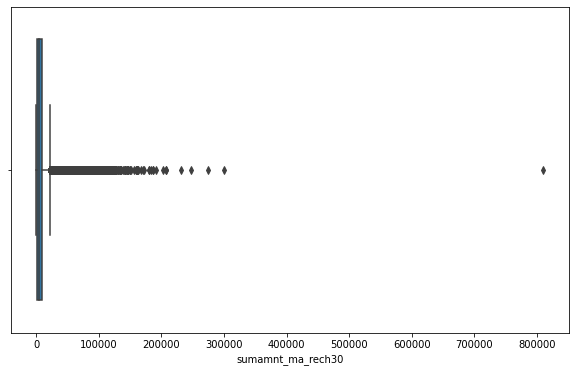

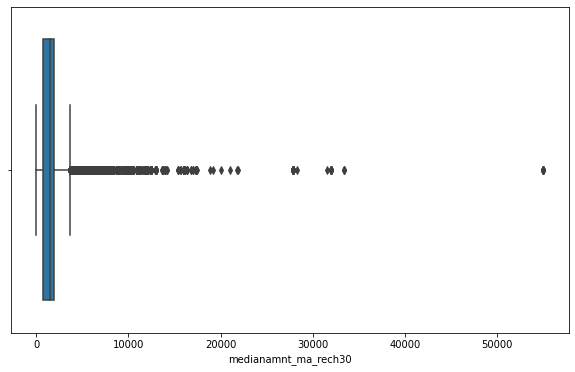

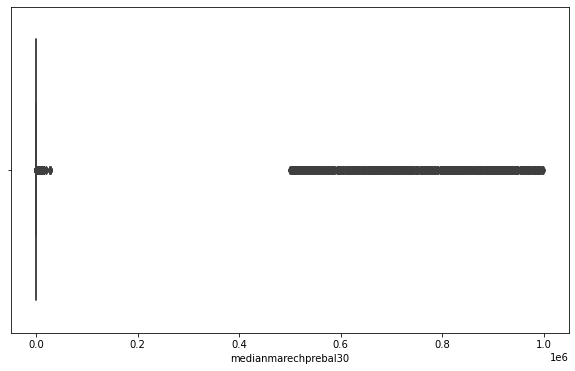

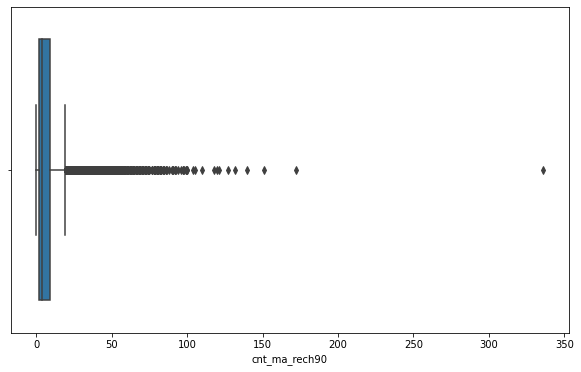

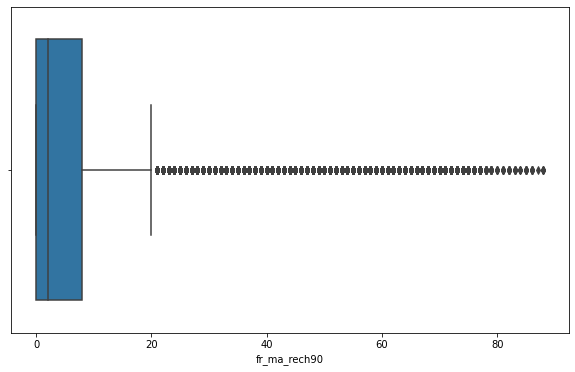

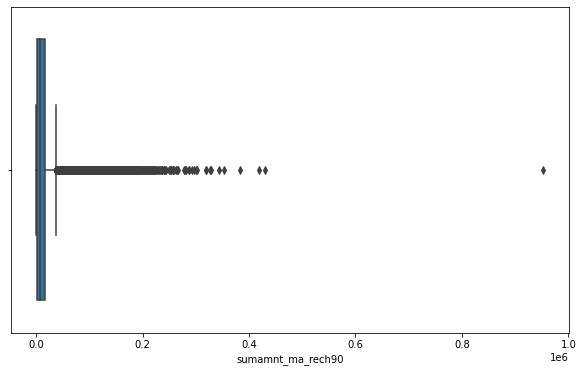

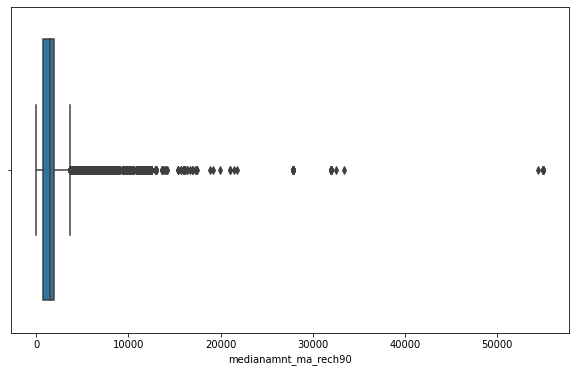

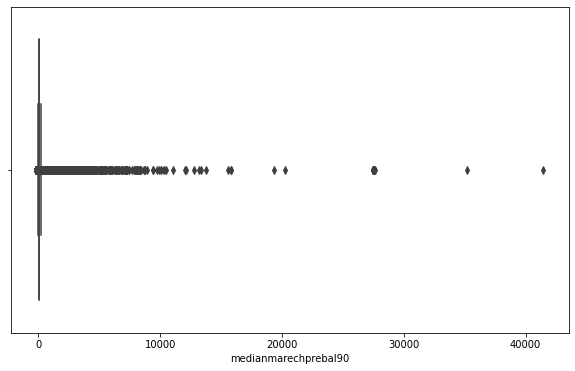

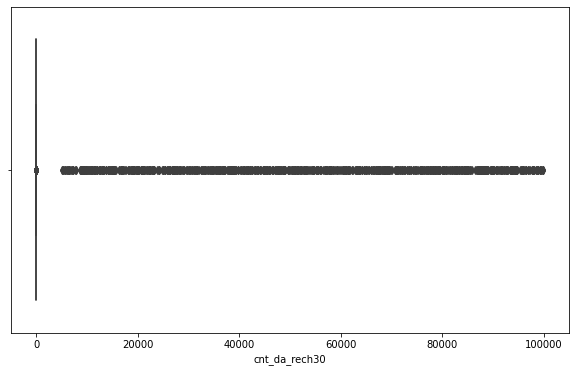

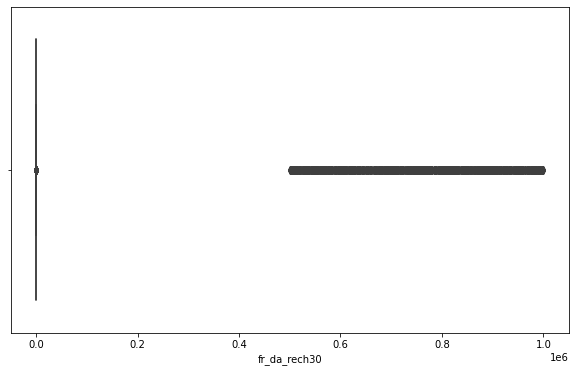

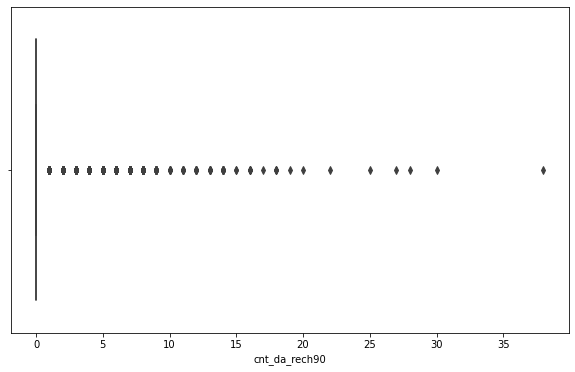

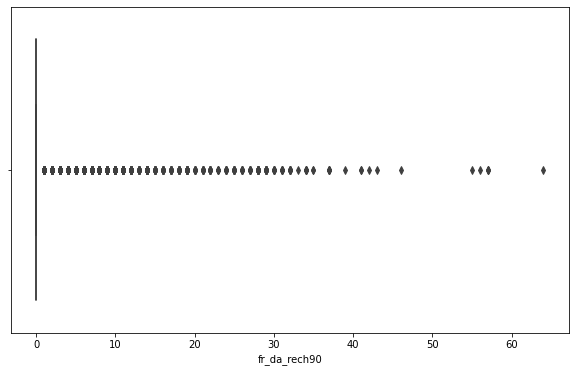

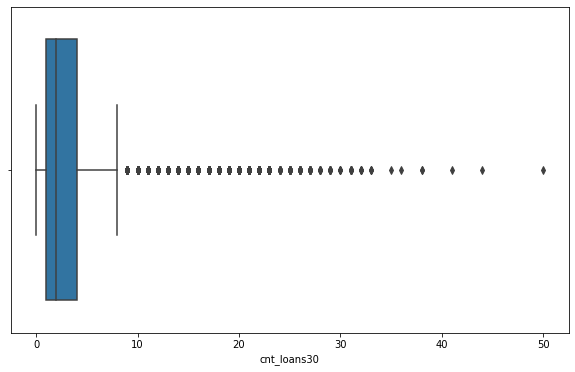

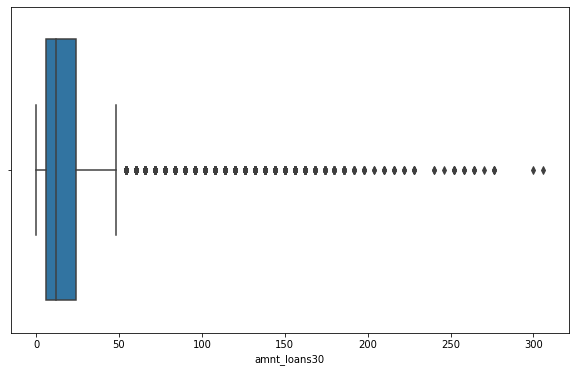

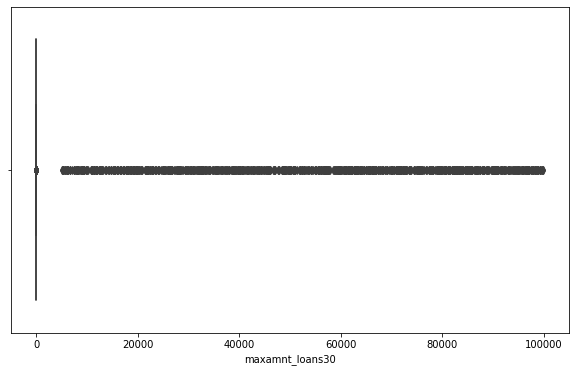

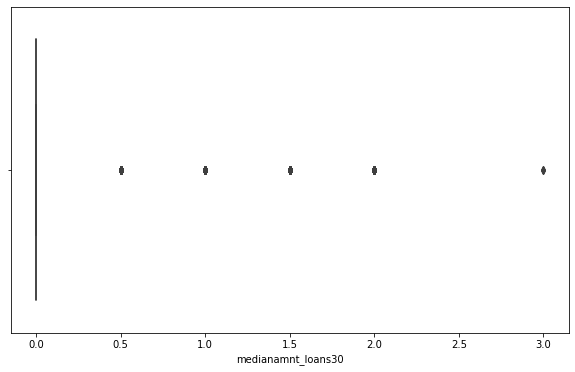

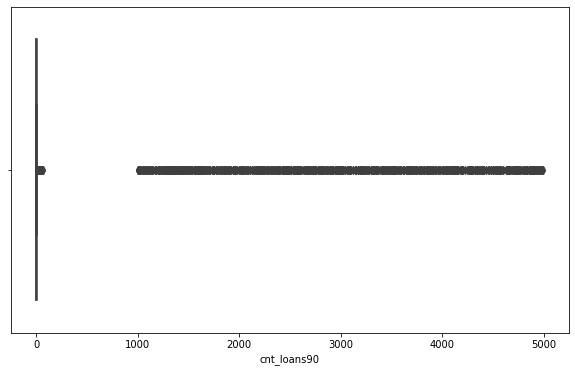

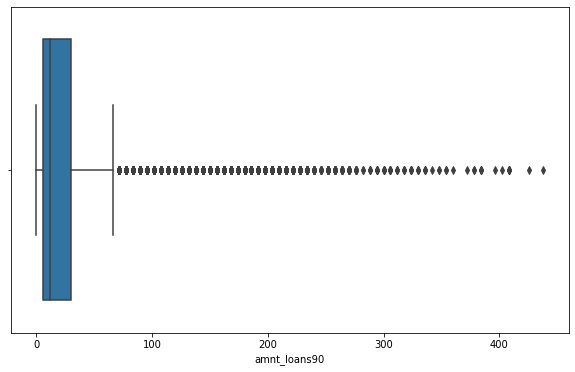

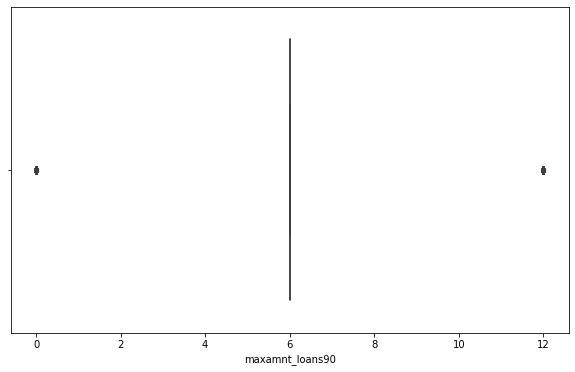

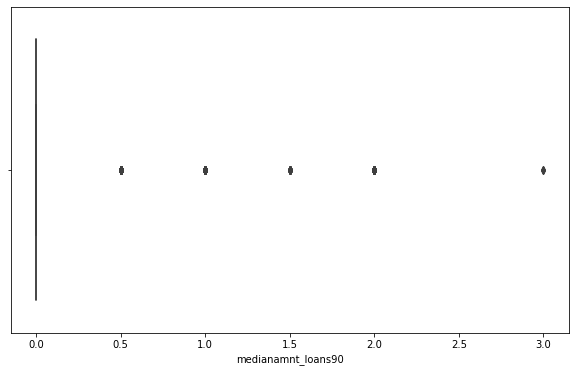

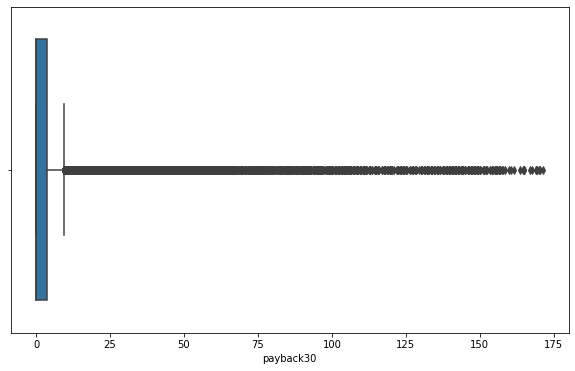

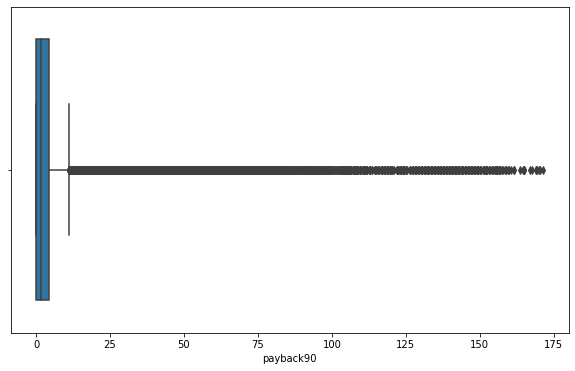

In [ ]:
for i in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[i])

Outliers are also present so need to treat outliers.

Multivariant analysis

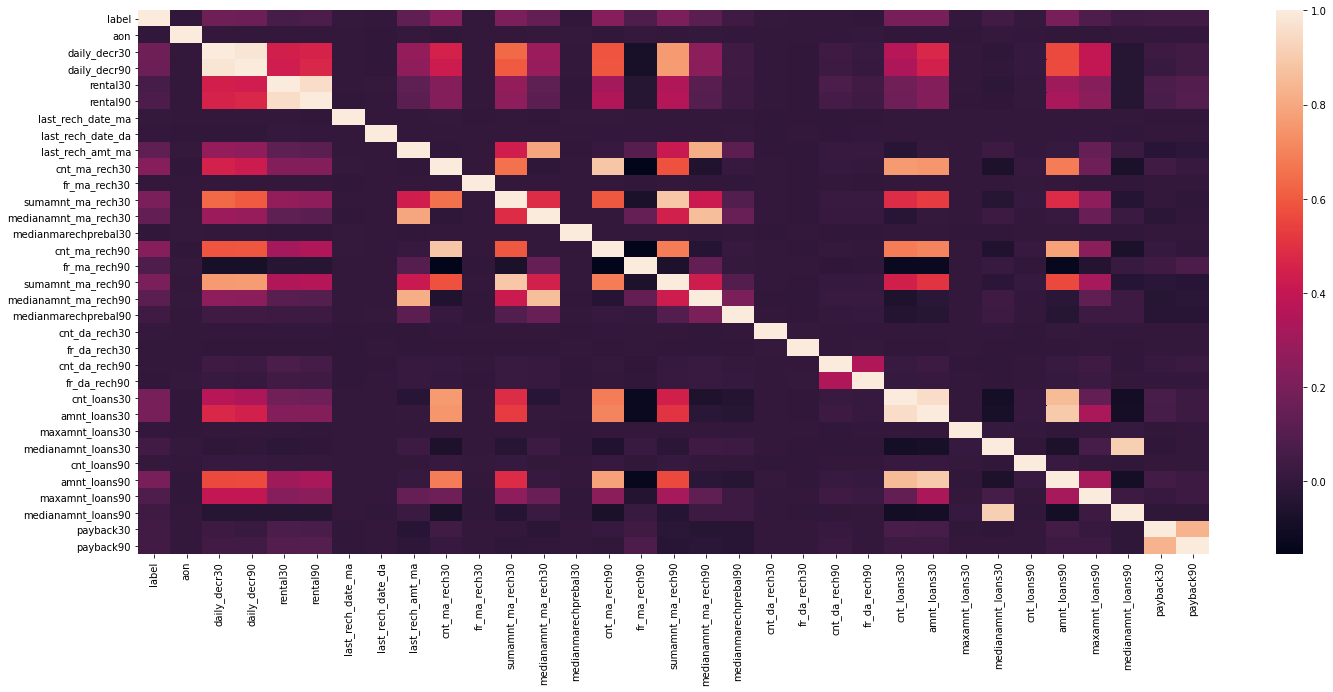

In [ ]:
df_corr=df.corr()
plt.figure(figsize=[24,10])
sns.heatmap(df_corr)


In [ ]:
df_corr["label"]

label                   1.000000
aon                    -0.004291
daily_decr30            0.167607
daily_decr90            0.165506
rental30                0.058060
rental90                0.075401
last_rech_date_ma       0.003458
last_rech_date_da       0.001388
last_rech_amt_ma        0.130994
cnt_ma_rech30           0.236755
fr_ma_rech30            0.001113
sumamnt_ma_rech30       0.201984
medianamnt_ma_rech30    0.141030
medianmarechprebal30   -0.004960
cnt_ma_rech90           0.235658
fr_ma_rech90            0.083628
sumamnt_ma_rech90       0.204930
medianamnt_ma_rech90    0.120054
medianmarechprebal90    0.038837
cnt_da_rech30           0.003959
fr_da_rech30           -0.000507
cnt_da_rech90           0.002552
fr_da_rech90           -0.005676
cnt_loans30             0.195328
amnt_loans30            0.196331
maxamnt_loans30         0.000614
medianamnt_loans30      0.045101
cnt_loans90             0.005005
amnt_loans90            0.198937
maxamnt_loans90         0.083486
medianamnt

In [ ]:
#STRONGLY +VE CORRELATED WITH CLASS
POS_CORR= df_corr["label"] > 0.1
POS_CORR

label                    True
aon                     False
daily_decr30             True
daily_decr90             True
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30            False
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90            False
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30           False
fr_da_rech30            False
cnt_da_rech90           False
fr_da_rech90            False
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30         False
medianamnt_loans30      False
cnt_loans90             False
amnt_loans90             True
maxamnt_loans90         False
medianamnt_loans90      False
payback30               False
payback90               False
Name: labe

## **4. Data pre-processing**

### 1)Null value removal

In [ ]:
print(df.isnull().sum())

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64


There is no null values in dataset

### 2)skewness

In [ ]:
df.skew()

label                   -2.290365
aon                     10.353683
daily_decr30             3.934535
daily_decr90             4.239909
rental30                 4.513980
rental90                 4.428011
last_rech_date_ma       14.780906
last_rech_date_da       14.814183
last_rech_amt_ma         3.771906
cnt_ma_rech30            3.277001
fr_ma_rech30            14.759500
sumamnt_ma_rech30        6.381436
medianamnt_ma_rech30     3.502885
medianmarechprebal30    14.775877
cnt_ma_rech90            3.418457
fr_ma_rech90             2.282828
sumamnt_ma_rech90        4.890923
medianamnt_ma_rech90     3.743741
medianmarechprebal90    44.740895
cnt_da_rech30           17.792250
fr_da_rech30            14.765326
cnt_da_rech90           27.171262
fr_da_rech90            28.881140
cnt_loans30              2.704813
amnt_loans30             2.967478
maxamnt_loans30         17.659986
medianamnt_loans30       4.568873
cnt_loans90             16.614481
amnt_loans90             3.141300
maxamnt_loans9

skewness is high so performing skewness removing methord

In [ ]:
#calculating the square root for data

df1 = np.sqrt(df)

df1.head(15)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
1,0.0,16.492423,55.272507,55.363797,14.836779,16.128546,1.414214,0.000000,39.230090,1.414214,4.582576,55.479726,39.230090,2.738613,1.414214,4.582576,55.479726,39.230090,2.738613,0.0,0.0,0.0,0.0,1.414214,3.464102,2.449490,0.0,1.414214,3.464102,2.449490,0.0,5.385165,5.385165
2,1.0,26.683328,110.099955,110.112443,60.755740,60.755740,4.472136,0.000000,76.072334,1.000000,0.000000,76.072334,76.072334,7.812810,1.000000,0.000000,76.072334,76.072334,7.812810,0.0,0.0,0.0,0.0,1.000000,3.464102,3.464102,0.0,1.000000,3.464102,3.464102,0.0,0.000000,0.000000
3,1.0,23.130067,37.389838,37.389838,30.002167,30.002167,1.732051,0.000000,39.230090,1.000000,0.000000,39.230090,39.230090,8.143709,1.000000,0.000000,39.230090,39.230090,8.143709,0.0,0.0,0.0,0.0,1.000000,2.449490,2.449490,0.0,1.000000,2.449490,2.449490,0.0,0.000000,0.000000
4,1.0,15.524175,4.607385,4.607385,12.626163,12.626163,6.403124,0.000000,30.773365,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.773365,30.773365,1.581139,0.0,0.0,0.0,0.0,1.414214,3.464102,2.449490,0.0,1.414214,3.464102,2.449490,0.0,0.000000,0.000000
5,1.0,30.773365,12.272707,12.272707,33.149661,33.149661,2.000000,0.000000,48.052055,2.645751,1.414214,141.523850,48.052055,5.385165,2.828427,1.414214,153.284050,53.740115,5.916080,0.0,0.0,0.0,0.0,2.645751,6.480741,2.449490,0.0,2.645751,6.480741,2.449490,0.0,1.527525,1.527525
6,1.0,23.832751,47.511711,47.554810,19.186714,19.496923,1.414214,0.000000,39.230090,2.000000,3.162278,78.460181,39.230090,3.924283,2.828427,0.000000,108.369737,39.230090,7.476630,0.0,0.0,0.0,0.0,1.732051,4.242641,2.449490,0.0,1.732051,4.242641,2.449490,0.0,3.316625,2.886751
7,1.0,23.345235,53.634333,53.702607,18.323482,20.072369,3.605551,0.000000,76.072334,1.000000,0.000000,76.072334,76.072334,16.667333,1.000000,0.000000,76.072334,76.072334,16.667333,0.0,0.0,0.0,0.0,1.000000,2.449490,2.449490,0.0,1.000000,2.449490,2.449490,0.0,0.000000,0.000000
8,1.0,27.712813,113.600176,133.432193,30.005833,50.488712,2.000000,7.416198,56.373753,1.732051,1.732051,102.000000,56.373753,6.000000,3.000000,1.732051,161.539469,56.373753,6.000000,0.0,0.0,1.0,0.0,1.732051,4.242641,2.449490,0.0,2.645751,6.480741,2.449490,0.0,2.449490,1.963961
9,1.0,34.510868,9.523392,9.523392,47.827816,47.827816,1.000000,0.000000,39.230090,2.000000,1.000000,78.511146,39.230090,6.316645,2.000000,1.000000,78.511146,39.230090,6.316645,0.0,0.0,0.0,0.0,2.000000,4.898979,2.449490,0.0,2.000000,4.898979,2.449490,0.0,1.632993,1.632993
10,1.0,23.151674,5.418241,5.418241,24.758029,24.758029,3.316625,0.000000,27.802878,1.000000,0.000000,27.802878,27.802878,9.316652,1.000000,0.000000,27.802878,27.802878,9.316652,0.0,0.0,0.0,0.0,1.000000,2.449490,2.449490,0.0,1.000000,2.449490,2.449490,0.0,0.000000,0.000000


In [ ]:
df1.skew()

label                   -2.290365
aon                      9.782738
daily_decr30             1.113995
daily_decr90             1.218407
rental30                 1.267406
rental90                 1.329141
last_rech_date_ma       14.174760
last_rech_date_da       14.242858
last_rech_amt_ma         0.798635
cnt_ma_rech30            0.355063
fr_ma_rech30            14.214816
sumamnt_ma_rech30        0.809195
medianamnt_ma_rech30     0.626744
medianmarechprebal30    13.928631
cnt_ma_rech90            0.610980
fr_ma_rech90             1.034392
sumamnt_ma_rech90        0.977223
medianamnt_ma_rech90     0.764904
medianmarechprebal90     4.183168
cnt_da_rech30           15.545948
fr_da_rech30            14.228286
cnt_da_rech90            8.158832
fr_da_rech90            19.619239
cnt_loans30              1.066564
amnt_loans30             1.141694
maxamnt_loans30         15.507235
medianamnt_loans30       3.707868
cnt_loans90             13.853827
amnt_loans90             1.339145
maxamnt_loans9

since the skewness is not reduced much in square root transformation again performing cube root transformation on same data.

In [ ]:
#calculating the cube root for the column

df2 = np.cbrt(df1)

df2.head(15)
df=df2

In [ ]:
df2.skew()

label                   -2.290365
aon                      6.159113
daily_decr30            -0.090540
daily_decr90            -0.042043
rental30                -0.777683
rental90                -0.656635
last_rech_date_ma        6.936068
last_rech_date_da       11.285632
last_rech_amt_ma        -1.902413
cnt_ma_rech30           -1.612781
fr_ma_rech30             4.471544
sumamnt_ma_rech30       -1.425279
medianamnt_ma_rech30    -1.685564
medianmarechprebal30     2.071695
cnt_ma_rech90           -1.715809
fr_ma_rech90            -0.425075
sumamnt_ma_rech90       -1.473585
medianamnt_ma_rech90    -1.975947
medianmarechprebal90    -1.058073
cnt_da_rech30           12.725098
fr_da_rech30            13.860086
cnt_da_rech90            6.097848
fr_da_rech90            15.982837
cnt_loans30             -2.319846
amnt_loans30            -2.171379
maxamnt_loans30          9.090146
medianamnt_loans30       3.479217
cnt_loans90              3.515453
amnt_loans90            -1.083871
maxamnt_loans9

In [ ]:
df2.shape

(208054, 33)

 Some of the dataset has the nature of skewness and outliers. we reduced outliers  and skewness as much as possible.

skewness reduction is performed 

### 3)outlier using z score

In [ ]:
from scipy import stats
import numpy as np
print("Old Shape: ", df2.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (208054, 33)
[[2.66551072 0.44327652 0.41584628 ... 0.24727228 1.69242364 1.53970345]
 [0.37516263 0.12696331 1.10857186 ... 0.24727228 0.96693003 1.06995358]
 [0.37516263 0.05205397 0.08813527 ... 0.24727228 0.96693003 1.06995358]
 ...
 [0.37516263 0.35988838 1.0955034  ... 0.24727228 0.94462335 0.79261898]
 [0.37516263 0.74152769 1.12535766 ... 0.24727228 0.96693003 1.13321968]
 [0.37516263 0.67419088 0.59358259 ... 0.24727228 0.96693003 1.06995358]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([     7,     34,     34, ..., 208048, 208048, 208052]), array([21, 26, 30, ..., 26, 30, 21]))


In [ ]:
after_zscore = df[(z < 3).all(axis=1)]

In [ ]:
after_zscore.shape

(0, 33)

### Removing outliers using zscore is not suggested since we loose more than 20% of the data

In [ ]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = df2.mean () + df2.std () * factor
lower_lim = df2.mean () - df2.std () * factor

data = df2[(df2 < upper_lim) & (df2 > lower_lim)]

After performing this droping the outliers methord creates Nan values. so now we can replace null values by median data. 

In [ ]:
data.shape

(208054, 33)

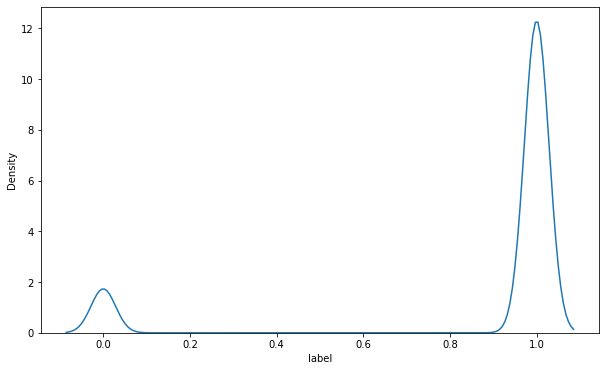

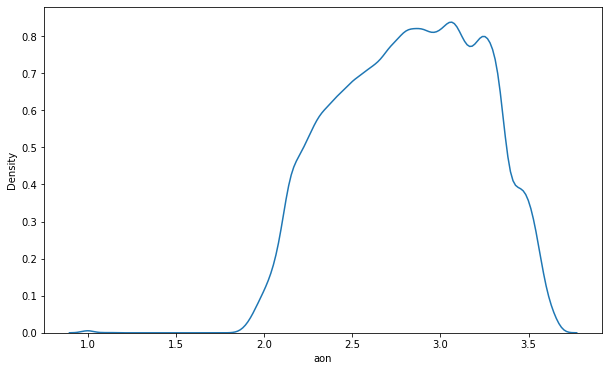

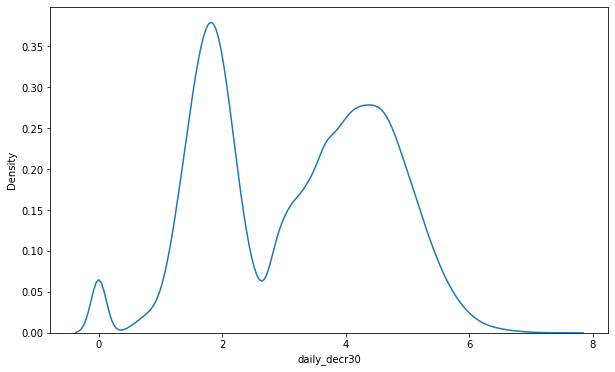

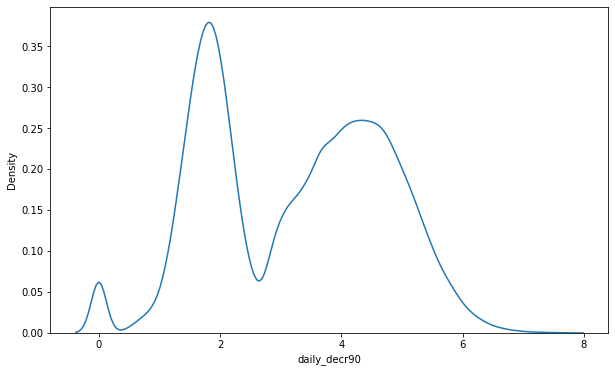

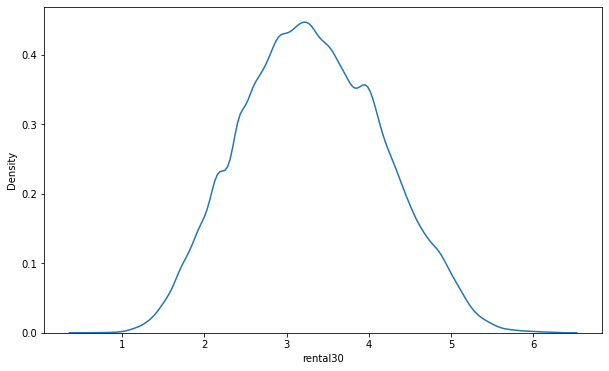

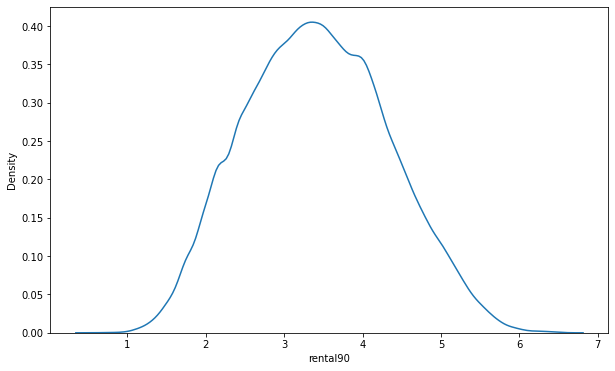

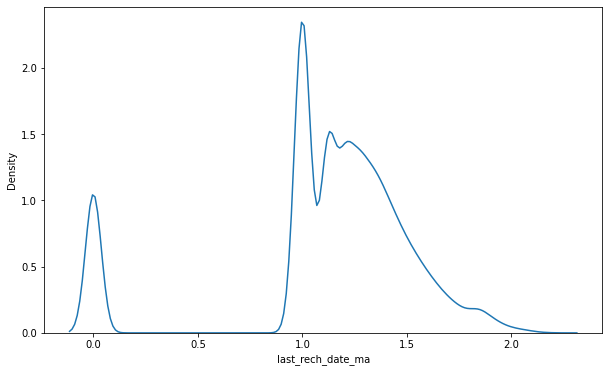

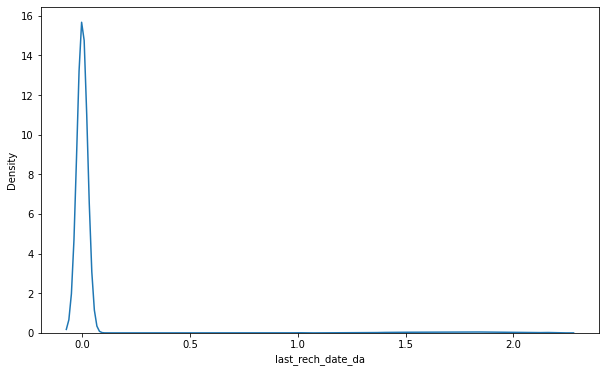

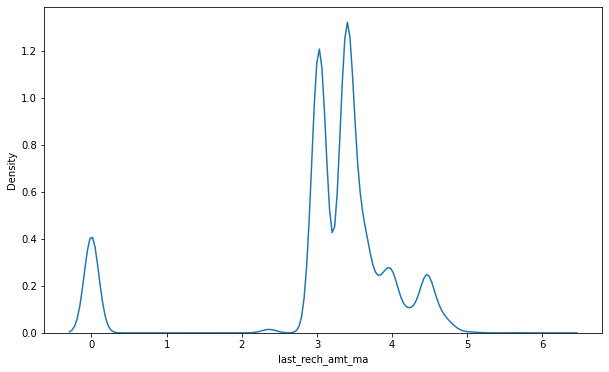

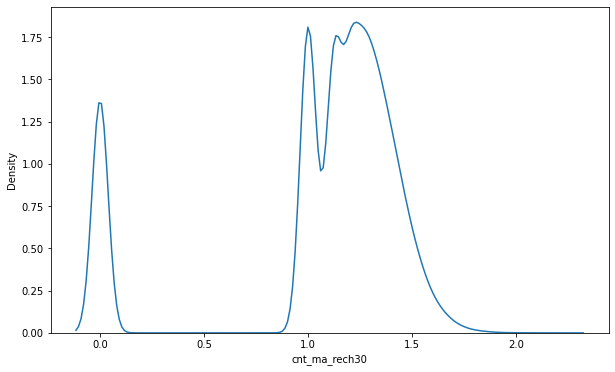

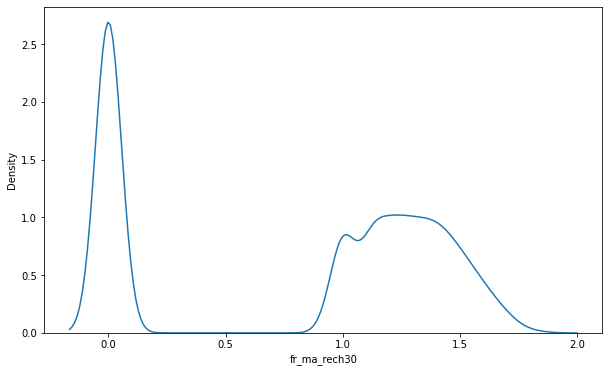

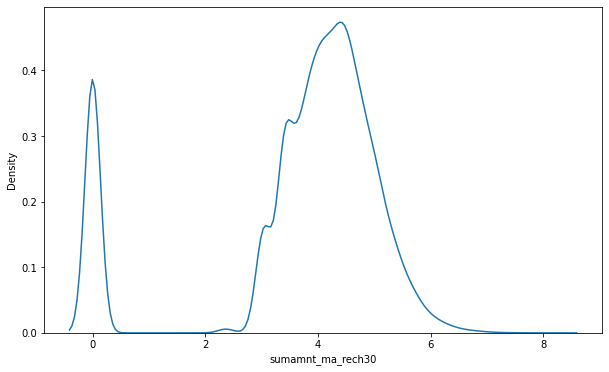

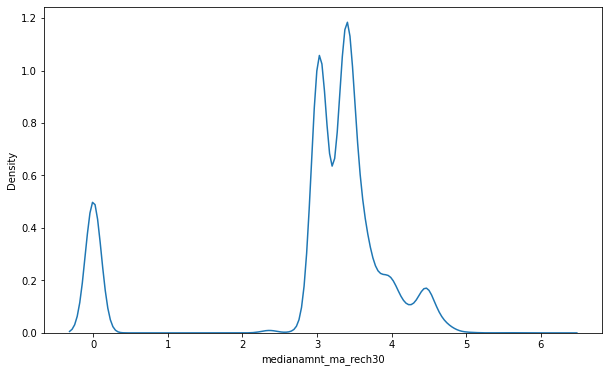

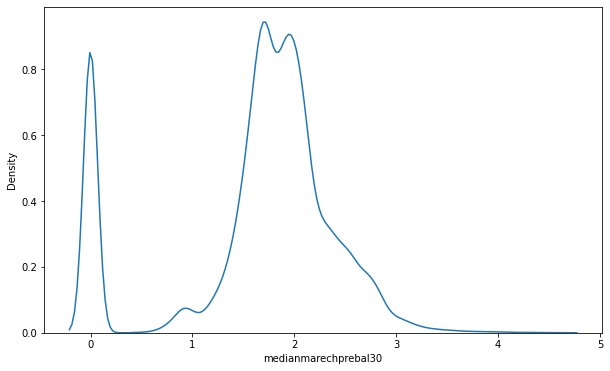

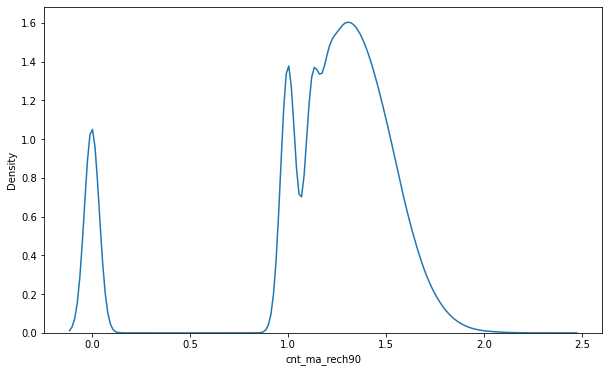

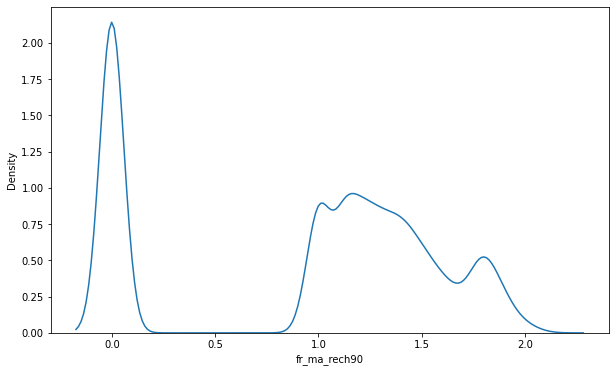

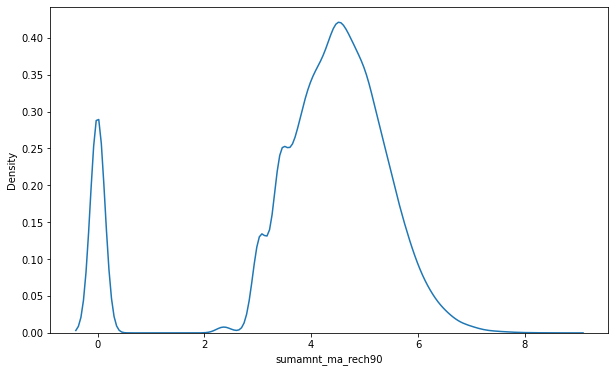

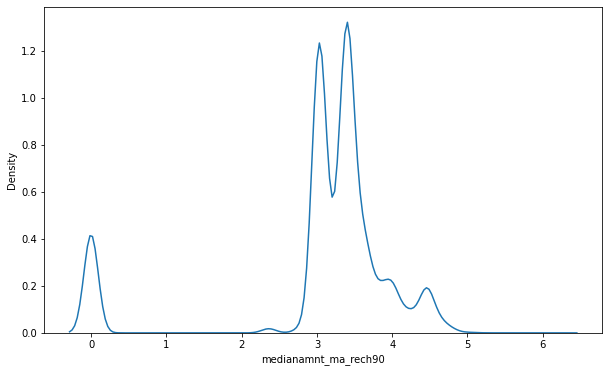

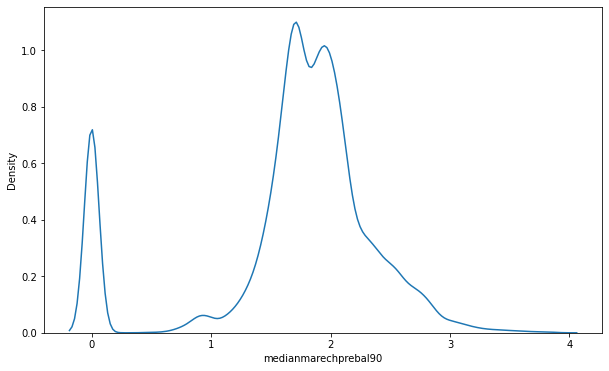

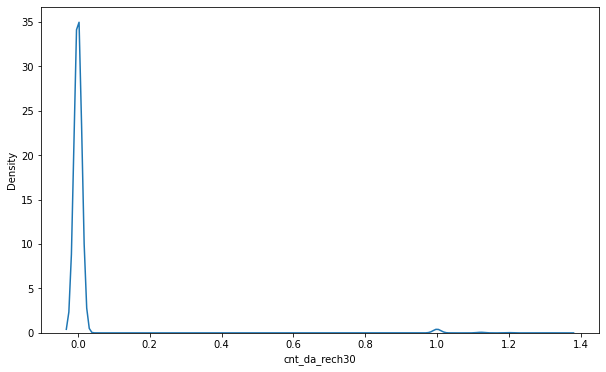

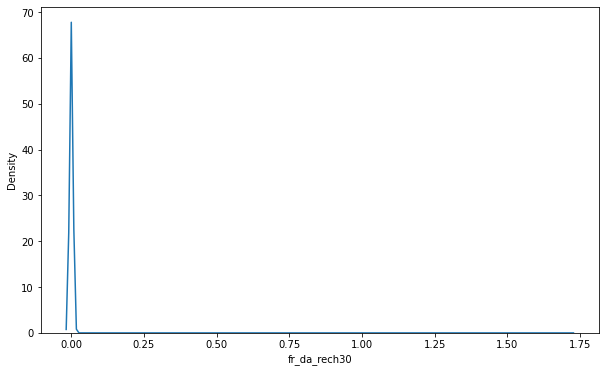

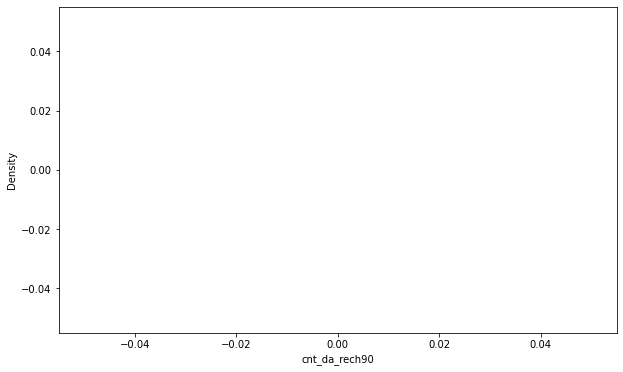

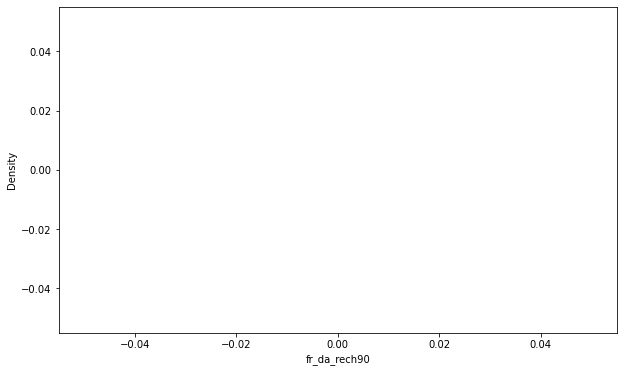

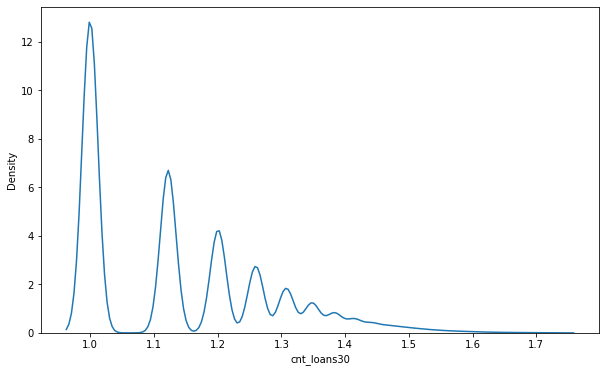

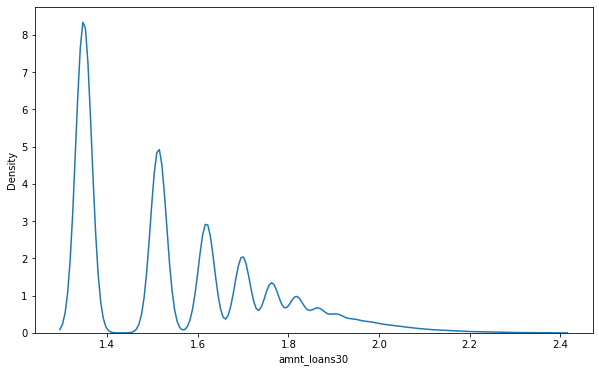

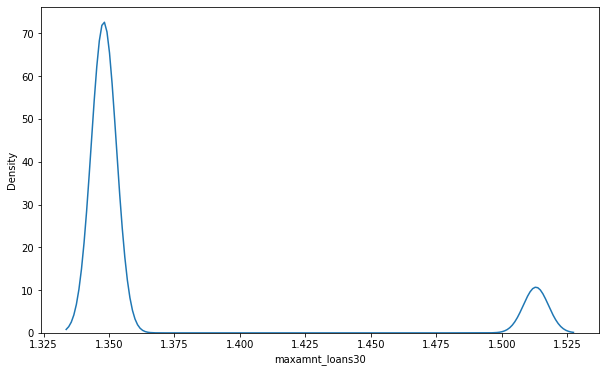

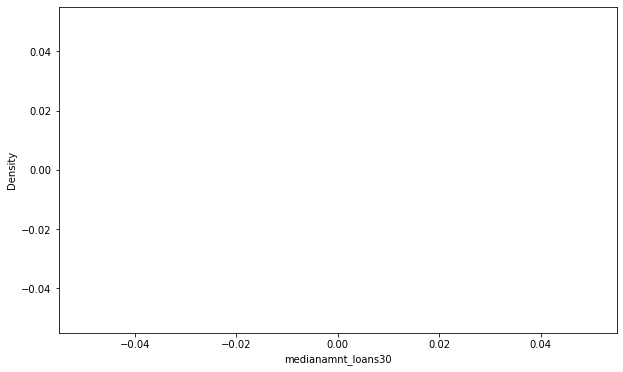

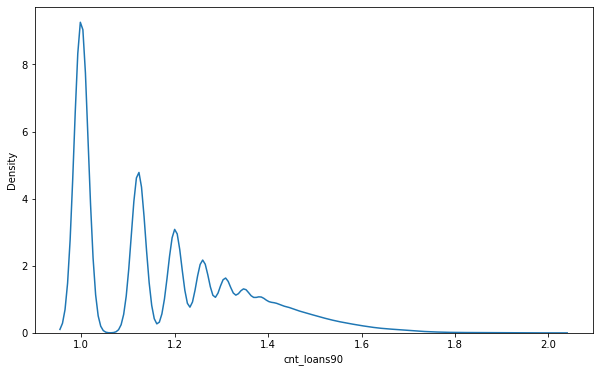

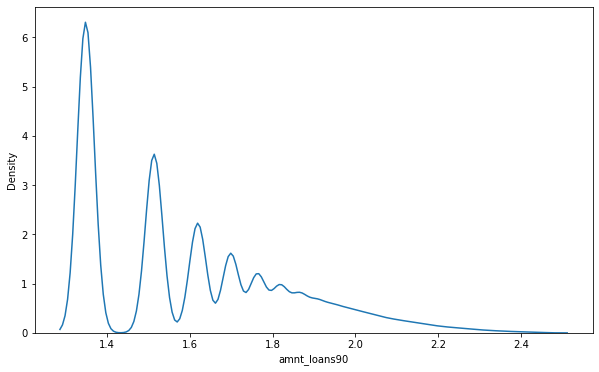

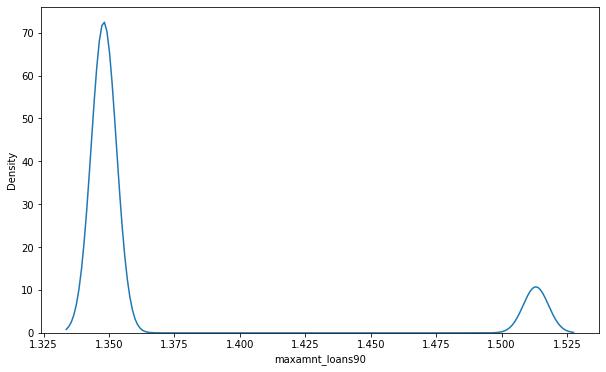

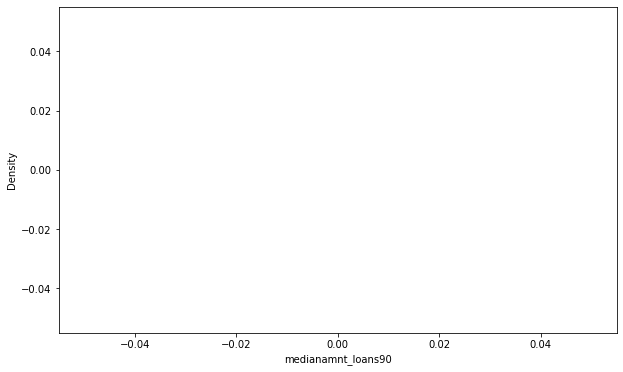

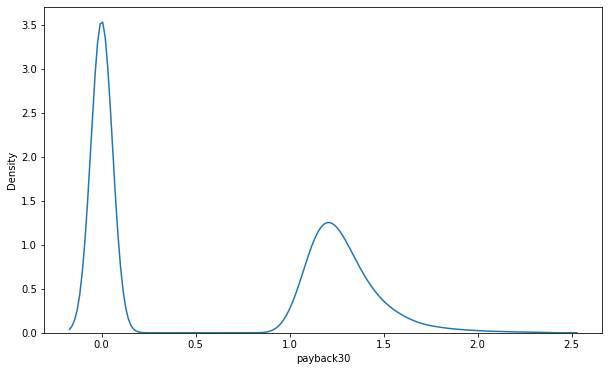

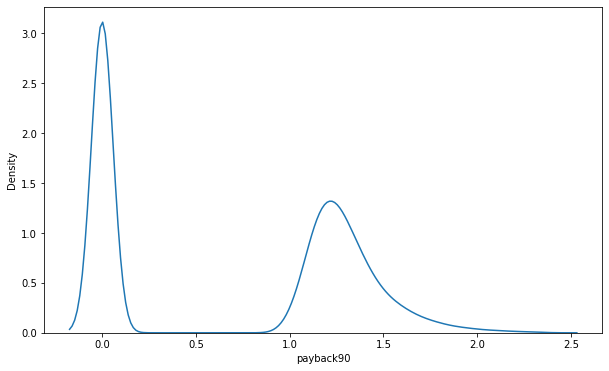

In [ ]:
for i in data.columns:
  plt.figure(figsize=[10,6])
  sns.kdeplot(data[i])

In [ ]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,208054.000000,205965.000000,206210.000000,206207.000000,194880.000000,195224.000000,205701.000000,207001.000000,208054.000000,208053.000000,207013.000000,208053.000000,208054.000000,205368.000000,208053.000000,208054.000000,208053.000000,208054.000000,206098.000000,206953.000000,207013.000000,202690.0,207189.0,204739.000000,204719.000000,203776.000000,194038.0,204980.000000,205783.000000,206012.000000,196017.0,208054.000000,208054.000000
mean,0.876619,2.822548,3.216966,3.253091,3.310926,3.424021,1.138774,0.047218,3.120827,1.067730,0.803938,3.701275,2.975042,1.645722,1.176306,0.936381,4.083717,3.083098,1.703291,0.015086,0.003414,0.0,0.0,1.140122,1.553466,1.369156,0.0,1.178143,1.601139,1.369324,0.0,0.637312,0.718645
std,0.328875,0.399771,1.426025,1.464076,0.845955,0.910432,0.439181,0.284433,1.126632,0.447536,0.640843,1.593821,1.230802,0.797510,0.437175,0.669972,1.573309,1.102393,0.717489,0.124703,0.067885,0.0,0.0,0.143223,0.201565,0.055174,0.0,0.174497,0.239941,0.055360,0.0,0.659110,0.671662
min,0.000000,1.000000,0.000000,0.000000,0.584804,0.584804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.348006,1.348006,0.0,1.000000,1.348006,1.348006,0.0,0.000000,0.000000
25%,1.000000,2.506544,1.893381,1.895287,2.701832,2.752400,1.000000,0.000000,3.027484,1.000000,0.000000,3.399338,3.027484,1.502391,1.122462,0.000000,3.638174,3.029446,1.572678,0.000000,0.000000,0.0,0.0,1.000000,1.348006,1.348006,0.0,1.000000,1.348006,1.348006,0.0,0.000000,0.000000
50%,1.000000,2.840272,3.404735,3.419952,3.282829,3.403500,1.200937,0.000000,3.397867,1.200937,1.122462,4.082978,3.397867,1.801037,1.259921,1.122462,4.407115,3.397867,1.821552,0.000000,0.000000,0.0,0.0,1.122462,1.513086,1.348006,0.0,1.122462,1.513086,1.348006,0.0,0.000000,1.088867
75%,1.000000,3.144641,4.412633,4.469634,3.921766,4.064259,1.383088,0.000000,3.635554,1.307660,1.348006,4.643135,3.526692,2.088557,1.442250,1.414214,5.025850,3.526692,2.075782,0.000000,0.000000,0.0,0.0,1.259921,1.698381,1.348006,0.0,1.307660,1.762734,1.348006,0.0,1.246441,1.284898
max,1.000000,3.669146,7.470605,7.608682,6.303198,6.572598,2.198770,2.205208,6.166808,2.205208,1.833569,8.179118,6.166808,4.565343,2.358240,2.109019,8.685325,6.166808,3.874512,1.348006,1.709976,0.0,0.0,1.721190,2.362789,1.513086,0.0,1.994757,2.449490,1.513086,0.0,2.357096,2.357096


Some of the data like medianamnt_loans30, medianamnt_loans90  become zero so **not recomended**


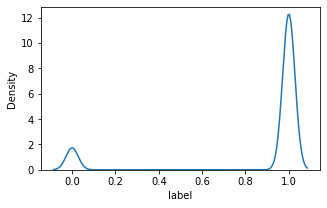

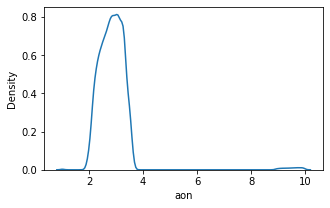

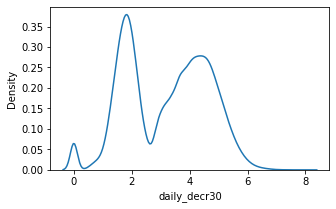

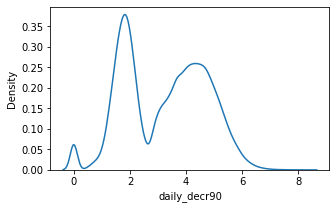

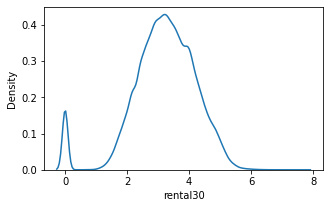

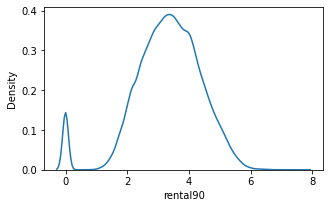

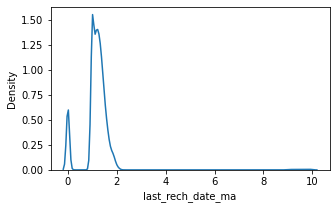

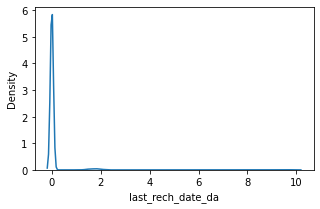

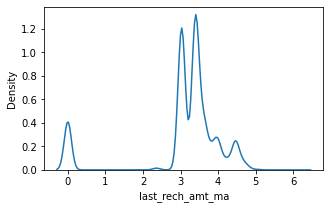

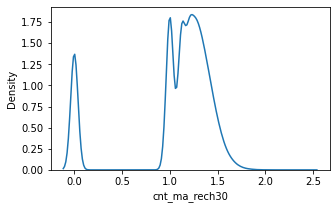

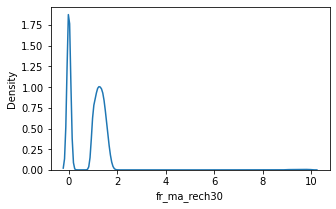

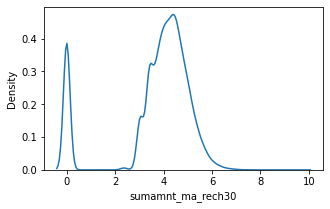

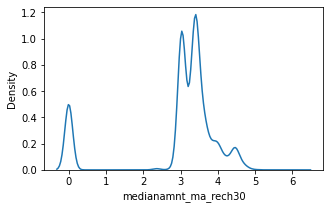

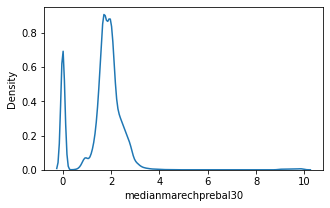

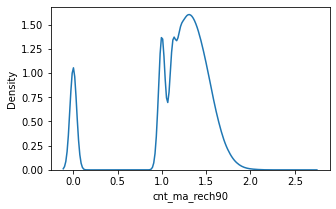

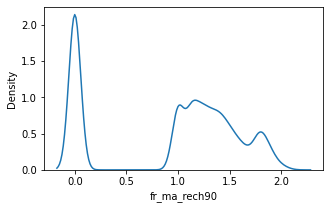

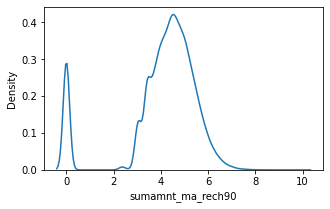

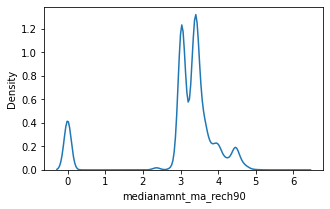

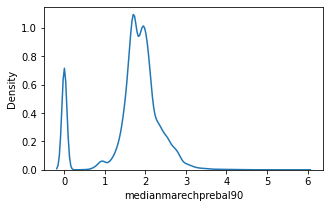

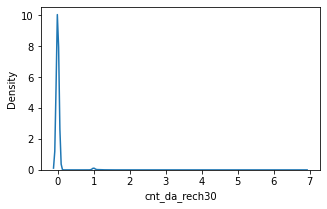

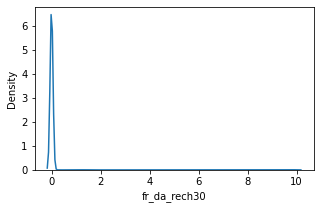

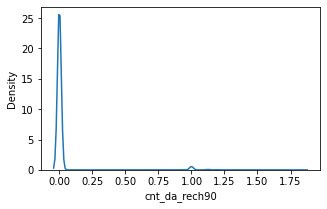

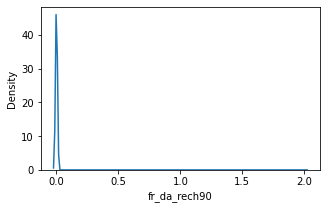

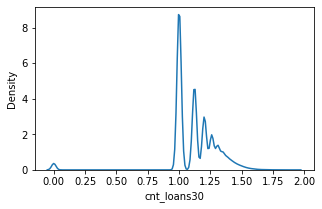

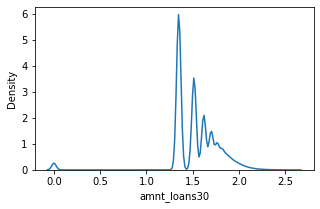

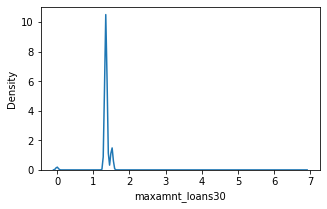

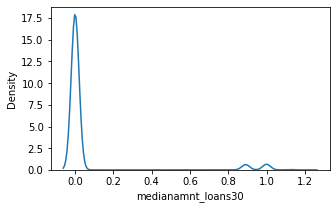

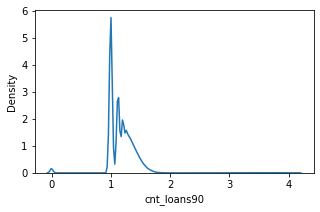

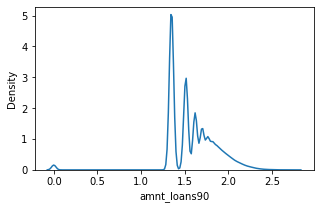

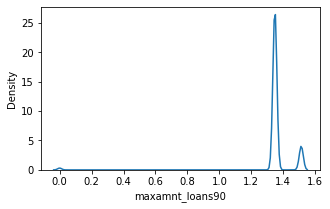

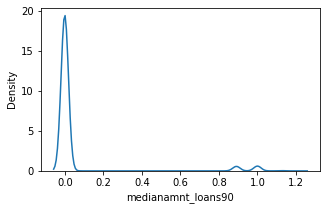

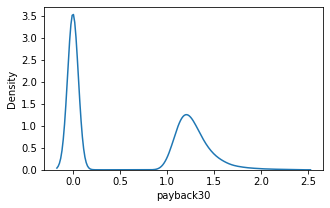

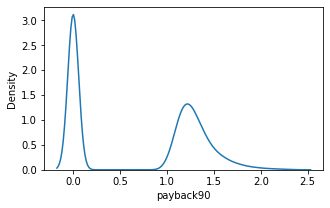

In [ ]:
for i in df.columns:
  plt.figure(figsize=[5,3])
  sns.kdeplot(df[i])

In [ ]:
df.isnull().sum()

label                      0
aon                        0
daily_decr30            1839
daily_decr90            1839
rental30                5586
rental90                5887
last_rech_date_ma       1312
last_rech_date_da         14
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1624
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1706
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
dtype: int64

**Replacing null values with median data.**

In [ ]:
median=df['daily_decr30'].median()
df['daily_decr30'] = df['daily_decr30'].replace(np.nan,median)

median=df['daily_decr90'].median()
df['daily_decr90'] = df['daily_decr90'].replace(np.nan,median)

median=df['rental30'].median()
df['rental30'] = df['rental30'].replace(np.nan,median)

median=df['rental90'].median()
df['rental90'] = df['rental90'].replace(np.nan,median)

median=df['last_rech_date_ma'].median()
df['last_rech_date_ma'] = df['last_rech_date_ma'].replace(np.nan,median)

median=df['daily_decr30'].median()
df['daily_decr30'] = df['daily_decr30'].replace(np.nan,median)

median=df['last_rech_date_da'].median()
df['last_rech_date_da'] = df['last_rech_date_da'].replace(np.nan,median)

median=df['medianmarechprebal30'].median()
df['medianmarechprebal30'] = df['medianmarechprebal30'].replace(np.nan,median)

median=df['medianmarechprebal90'].median()
df['medianmarechprebal90'] = df['medianmarechprebal90'].replace(np.nan,median)

In [ ]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

## **5.Feature Engineering**

### 1)Test Train split

In [ ]:
from sklearn.model_selection import train_test_split

x= df.drop(columns='label')
y= df['label']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [ ]:
x_train.describe()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000,166443.000000
mean,2.891032,3.220598,3.256742,3.189595,3.308885,1.180743,0.095593,3.121526,1.068122,0.847266,3.702782,2.975576,1.686988,1.176713,0.936204,4.085247,3.083352,1.708009,0.046083,0.051453,0.027097,0.005862,1.122845,1.530050,1.371439,0.064358,1.179574,1.586911,1.356045,0.055187,0.638049,0.719817
std,0.784634,1.420717,1.458695,1.028129,1.075762,0.732853,0.729877,1.126378,0.447436,0.885952,1.593302,1.230171,0.965117,0.437167,0.669878,1.572947,1.101767,0.719374,0.446717,0.677714,0.167117,0.091929,0.200250,0.277600,0.376276,0.239746,0.276203,0.287661,0.145309,0.222982,0.658915,0.671341
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.509901,1.900360,1.902037,2.635339,2.699064,1.000000,0.000000,3.027484,1.000000,0.000000,3.399338,3.027484,1.513086,1.122462,0.000000,3.638174,3.029446,1.579024,0.000000,0.000000,0.000000,0.000000,1.000000,1.348006,1.348006,0.000000,1.000000,1.348006,1.348006,0.000000,0.000000,0.000000
50%,2.845656,3.404823,3.419952,3.239915,3.359285,1.200937,0.000000,3.397867,1.200937,1.122462,4.082978,3.397867,1.805756,1.259921,1.122462,4.407716,3.397867,1.823045,0.000000,0.000000,0.000000,0.000000,1.122462,1.513086,1.348006,0.000000,1.122462,1.513086,1.348006,0.000000,0.000000,1.093096
75%,3.154856,4.407315,4.463222,3.873642,4.020763,1.383088,0.000000,3.635554,1.307660,1.348006,4.643444,3.526692,2.091066,1.442250,1.414214,5.028238,3.526692,2.075349,0.000000,0.000000,0.000000,0.000000,1.259921,1.698381,1.348006,0.000000,1.307660,1.762734,1.348006,0.000000,1.246441,1.284898
max,9.999768,8.019122,8.273083,6.897289,7.438452,9.996124,9.998619,6.166808,2.424279,9.999344,9.655085,6.166808,9.999132,2.636675,2.109019,9.920150,6.166808,5.724294,6.811949,9.998671,1.833569,2.000000,1.919383,2.595894,6.811382,1.200937,4.134195,2.755787,1.513086,1.200937,2.354800,2.354800


In [ ]:
print(df['label'].value_counts())

1.0    182384
0.0     25670
Name: label, dtype: int64


Since the label does not contain equal no of 0 and 1. so performing data imbalencing techniques.  

### 2)Data Imbalence

In [ ]:
from sklearn.utils import resample

In [ ]:
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.label==0]
label1=X[X.label==1]
label_unsampled=resample(label0,replace=True,n_samples=len(label1),random_state=27)
unsampled=pd.concat([label1,label_unsampled])
unsampled.label.value_counts()

0.0    145886
1.0    145886
Name: label, dtype: int64

In [ ]:
x_train= unsampled.drop(columns='label')
y_train= unsampled['label']

### 3)Min Max scaling

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [ ]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [ ]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000,291772.000000
mean,0.205588,0.349774,0.341807,0.431953,0.412982,0.108466,0.008724,0.439662,0.362341,0.064340,0.312757,0.407674,0.140399,0.373521,0.347041,0.341817,0.435866,0.253955,0.006280,0.005248,0.013194,0.003555,0.566826,0.569351,0.201804,0.042810,0.273310,0.549958,0.895751,0.037949,0.192920,0.220777
std,0.088823,0.186047,0.183469,0.175455,0.168834,0.082209,0.071373,0.236153,0.224139,0.090776,0.197130,0.249834,0.109691,0.204584,0.340819,0.191929,0.232731,0.151971,0.062658,0.068116,0.086941,0.050589,0.086465,0.089268,0.053156,0.179559,0.062147,0.090213,0.073840,0.169434,0.271587,0.284862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.161268,0.202433,0.196752,0.351214,0.331692,0.100039,0.000000,0.490932,0.000000,0.000000,0.000000,0.000000,0.000000,0.379266,0.000000,0.305383,0.490932,0.196087,0.000000,0.000000,0.000000,0.000000,0.521001,0.519284,0.197905,0.000000,0.241885,0.489155,0.890899,0.000000,0.000000,0.000000
50%,0.199855,0.372797,0.362091,0.457147,0.436229,0.120140,0.000000,0.508157,0.463009,0.000000,0.376733,0.491250,0.168652,0.425711,0.474154,0.399044,0.508157,0.300682,0.000000,0.000000,0.000000,0.000000,0.521001,0.519284,0.197905,0.000000,0.241885,0.549058,0.890899,0.000000,0.000000,0.000000
75%,0.235535,0.494965,0.482161,0.547232,0.524780,0.141476,0.000000,0.551469,0.519710,0.126000,0.454099,0.551023,0.199756,0.511252,0.639163,0.471288,0.551469,0.349388,0.000000,0.000000,0.000000,0.000000,0.625689,0.623627,0.197905,0.000000,0.290489,0.587444,0.890899,0.000000,0.500081,0.523268
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.00000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000,41611.000000
mean,0.209345,0.400453,0.392448,0.462055,0.444817,0.118269,0.008953,0.505615,0.439798,0.084829,0.382741,0.482082,0.168555,0.445529,0.444326,0.411056,0.499786,0.297803,0.006149,0.004901,0.014559,0.00294,0.583949,0.588289,0.200889,0.052955,0.285141,0.575010,0.895681,0.045496,0.269392,0.303192
std,0.082567,0.176700,0.175854,0.148493,0.144216,0.074265,0.070012,0.182858,0.184788,0.088843,0.165317,0.199996,0.098074,0.165837,0.317852,0.158768,0.179170,0.126056,0.061073,0.066055,0.090645,0.04599,0.105854,0.108386,0.054355,0.198324,0.067925,0.104702,0.097643,0.184662,0.280232,0.285770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.168142,0.236394,0.229342,0.381075,0.361910,0.100039,0.000000,0.490932,0.412494,0.000000,0.352077,0.490932,0.150469,0.425711,0.000000,0.366746,0.491250,0.275099,0.000000,0.000000,0.000000,0.00000,0.521001,0.519284,0.197905,0.000000,0.241885,0.489155,0.890899,0.000000,0.000000,0.000000
50%,0.205276,0.424588,0.413383,0.469738,0.451611,0.120140,0.000000,0.550993,0.495379,0.112254,0.422823,0.550993,0.180591,0.477845,0.532220,0.444168,0.550993,0.318359,0.000000,0.000000,0.000000,0.00000,0.584804,0.582877,0.197905,0.000000,0.271507,0.549058,0.890899,0.000000,0.000000,0.462403
75%,0.239612,0.548032,0.538052,0.560980,0.540408,0.138362,0.000000,0.589536,0.539402,0.134809,0.480812,0.571883,0.208958,0.536363,0.677202,0.506021,0.571883,0.362008,0.000000,0.000000,0.000000,0.00000,0.656420,0.654257,0.197905,0.000000,0.316303,0.639648,0.890899,0.000000,0.529319,0.545651
max,0.999582,0.940338,0.946977,1.107738,1.028196,1.000163,0.999721,1.000000,0.822825,0.999920,0.847131,1.000000,0.999557,0.839957,1.000000,0.875524,1.000000,1.027725,0.998826,1.000101,0.961368,0.98088,0.933091,0.982950,0.999558,1.000000,1.000157,0.978309,1.000000,1.000000,1.000975,1.000975


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## **6. Building the model**

### Random Forest Classifier

In [ ]:
clf= RandomForestClassifier(n_estimators=700).fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

              precision    recall  f1-score   support

         0.0       0.76      0.44      0.56      5075
         1.0       0.93      0.98      0.95     36536

    accuracy                           0.92     41611
   macro avg       0.85      0.71      0.76     41611
weighted avg       0.91      0.92      0.90     41611



In [ ]:
randomforest_accu

0.9130999014683617

In [ ]:
from sklearn.model_selection import cross_val_score
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.9135801342384132

### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
#svc=SVC(kernel='rbf')
#svc.fit(x_train,y_train)

svc = LinearSVC(random_state=0, tol=1e-5)
svc.fit(x_train, y_train.ravel()) 


svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7540073538247098
[[ 3920  1193]
 [ 9043 27455]]
              precision    recall  f1-score   support

         0.0       0.30      0.77      0.43      5113
         1.0       0.96      0.75      0.84     36498

    accuracy                           0.75     41611
   macro avg       0.63      0.76      0.64     41611
weighted avg       0.88      0.75      0.79     41611



In [ ]:
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 3).mean()
svc_cv

0.8808674682032694

### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()
dtc_acc=accuracy_score(y_test,predDTC)
print(dtc_acc)
crDTC

0.8663574535579535


,precision,recall,f1-score,support
0.0,0.455978,0.495961,0.475130,5075.000000
1.0,0.929124,0.917807,0.923431,36536.000000
accuracy,0.866357,0.866357,0.866357,0.866357
macro avg,0.692551,0.706884,0.699280,41611.000000
weighted avg,0.871417,0.866357,0.868755,41611.000000


In [ ]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(DTC,x,y,scoring='accuracy', cv = 3).mean()
dtc_cv

0.8661789750706822

### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.7737617456922449


,precision,recall,f1-score,support
0.0,0.312069,0.698416,0.431384,5113.000000
1.0,0.948886,0.784317,0.858789,36498.000000
accuracy,0.773762,0.773762,0.773762,0.773762
macro avg,0.630477,0.741366,0.645086,41611.000000
weighted avg,0.870637,0.773762,0.806271,41611.000000


In [ ]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 3).mean()
gnb_cv

0.804497877366278

### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

predKNN = KNN.predict(x_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()
knn_acc=accuracy_score(y_test,predKNN)
print(knn_acc)
crKNN

0.8110836076998871


,precision,recall,f1-score,support
0.0,0.359394,0.686877,0.471884,5113.000000
1.0,0.949716,0.828484,0.884967,36498.000000
accuracy,0.811084,0.811084,0.811084,0.811084
macro avg,0.654555,0.757680,0.678426,41611.000000
weighted avg,0.877179,0.811084,0.834209,41611.000000


In [ ]:
knn_cv=cross_val_score(KNN,x,y,scoring='accuracy', cv = 3).mean()
knn_cv

0.9023618883842563

In [ ]:
print("model                    ","accuracy           ","cv          ","difference")
print("-------------------------------------------------------------------------------------")
print("random forest            ", round(randomforest_accu,2),"            ",round(randomforest_cv,2 ),"               ",round(randomforest_accu-randomforest_cv,2 ))
print("SVC                      ",round(svc_acc,2),"            ",round(svc_cv,2),"               ",round(svc_acc-svc_cv,2 ))
print("gaussian naive bayes     ",round(gnb_acc,2),"           ",round(gnb_cv,2),"               ",round(gnb_acc-gnb_cv,2 ))
print("decission tree classifier",round(dtc_acc,2),"            ",round(dtc_cv,2),"               ",round(dtc_acc-dtc_cv,2 ))
print("KNN                      ",round(knn_acc,2),"            ",round(knn_cv,2),"               ",round(knn_acc-knn_cv,2 ))

model                     accuracy            cv           difference
-------------------------------------------------------------------------------------
random forest             0.92              0.91                 0.01
SVC                       0.75              0.88                 -0.13
gaussian naive bayes      0.81             0.8                 0.01
decission tree classifier 0.87              0.91                 -0.04
KNN                       0.81              0.9                 -0.09


Best models are Randome Forest,Gaussian naive bayes,Decission tree classifier.

Three best model among five is choosen based on accuracy score - cross valiadtion.

The three best model is taken for hyper parameter tuning.

## **7. Hyper parameter tuning for the best models**

### 1)D-tree hyper parameter tuning

In [ ]:
#FINDING BEST RANDOM STATE

from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  DTC.fit(x_train,y_train)
  pred_train=DTC.predict(x_train)
  pred_test = DTC.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)
  #a[i]=c
  #print(f"At randome state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}")
  #print(f"At randome state {i}, the test accuracy is :- {r2_score(y_test,pred_test)}")

0 1.2388781735085848
least value 0 1.2388781735085848
1 1.2052151274022744
least value 1 1.2052151274022744
2 1.2084917438065184
3 1.25594278486687
4 1.2259092259138376
5 1.2287034244941122
6 1.2493364111868166
7 1.2278166668548192
8 1.240046236412868
9 1.2312324688500342
10 1.2704365548672683
11 1.2434303575645527
12 1.2293056344154332
13 1.2210508784402685
14 1.2220858318931347
15 1.2165701849690422
16 1.229304294831246
17 1.2422657775764403
18 1.2108051397369533
19 1.2422998750439285
20 1.2265192025452696
21 1.2143481433362862
22 1.2600473301030646
23 1.2176190263354276
24 1.2039327388471937
least value 24 1.2039327388471937
25 1.2387891520423069
26 1.263247597732875
27 1.2247215653985486
28 1.2479509267053563
29 1.2478977379002074
30 1.2178888506875265
31 1.2660999442778942
32 1.2274448696918476
33 1.2502618927732712
34 1.2240085245411478
35 1.2320049422472894
36 1.2457541889204058
37 1.2555013470856726
38 1.2303770456657115
39 1.2266428640622353
40 1.2180205762754626
41 1.23709573

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random']}

In [ ]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}

In [ ]:
# Create the some more parameters list
parameters_DT = {'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]} 

In [ ]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters_DT,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                      

In [ ]:
GCV.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
final_mod=DecisionTreeClassifier(criterion='gini',splitter= 'best',random_state = 1,max_depth=10,min_samples_leaf= 2, min_samples_split= 2)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.9104323376030377


In [ ]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(final_mod,x,y,scoring='accuracy', cv = 5).mean()
dtc_cv

0.909571556626329

### 2)GaussianNB hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.5...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.0005336699231206307}

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing = 0.0005336)

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.8140876210617385


,precision,recall,f1-score,support
0.0,0.352641,0.627389,0.451503,5075.000000
1.0,0.941962,0.840021,0.888075,36536.000000
accuracy,0.814088,0.814088,0.814088,0.814088
macro avg,0.647302,0.733705,0.669789,41611.000000
weighted avg,0.870087,0.814088,0.834830,41611.000000


In [ ]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 5).mean()
gnb_cv

0.8105540039416237

### 3)RandomForestClassifier hyper parameter tuning

In [ ]:
#FINDING BEST RANDOM STATE

from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  clf.fit(x_train,y_train)
  pred_train=clf.predict(x_train)
  pred_test = clf.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    e=i
    #print("least value",i,d)
  #a[i]=c
  #print(f"At randome state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}")
  #print(f"At randome state {i}, the test accuracy is :- {r2_score(y_test,pred_test)}")
print("best random state is",e,"value is ",d)

0 0.019179118521843508
1 0.028924915735500933
2 0.02622147756397719
3 0.0024620313243229885
4 0.024083022904965112
5 0.022545667125479674
6 0.021597272891985098
7 0.009578968329568838
8 0.027984442468555693
9 0.015678166429079377
10 0.0037980643162708327
11 0.003528334157253288
12 0.019428350592116783
13 0.009255136651882823
14 0.01003415541578101
15 0.02363711354960385
16 0.009910473628848782
17 0.0011984104156140818
18 -0.0004148472712822704
19 0.020980487310137352
20 0.010581751373439308
21 0.01873045259923556
22 0.017420031942218972
23 0.0031649960032996693
24 0.0030413798851377516
25 0.00030411655868634035
26 -0.006234988779245776
27 0.01103845457013175
28 0.021032143766736455
29 0.028898833878370445
30 -0.006606668748590949
31 0.04131260875558884
32 0.0038545946731505243
33 0.00977797848331885
34 0.005659045588435219
35 0.006316169008902861
36 0.009412203646194217
37 0.01627107156672225
38 0.01342444592732428
39 0.014007715761626072
40 0.010488991346320753
41 0.003414155991671608

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy']}
rf=GridSearchCV(RandomForestClassifier(),parameter,cv=3)

In [ ]:
#rf=RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [ ]:
clf= RandomForestClassifier(criterion='gini',max_depth=9,random_state=59).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))

              precision    recall  f1-score   support

         0.0       0.84      0.32      0.47      5075
         1.0       0.91      0.99      0.95     36536

    accuracy                           0.91     41611
   macro avg       0.88      0.66      0.71     41611
weighted avg       0.90      0.91      0.89     41611



In [ ]:
randomforest_accu

0.9093508927927711

In [ ]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.9096628790986884

## **8.Evaluation metrics**

### Precision, Recall, f1-score

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
print("Random Forest")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_rfc = accuracy_score(y_test, fianlRFC)
print('Accuracy: %f' % accuracy_rfc)
# precision tp / (tp + fp)
precision_rfc = precision_score(y_test, fianlRFC)
print('Precision: %f' % precision_rfc)
# recall: tp / (tp + fn)
recall_rfc = recall_score(y_test, fianlRFC)
print('Recall: %f' % recall_rfc)
# f1: 2 tp / (2 tp + fp + fn)
f1_rfc = f1_score(y_test, fianlRFC)
print('F1 score: %f' % f1_rfc)


print("------------------------------------------")
print("Decision Tree")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_dt = accuracy_score(y_test, pred)
print('Accuracy: %f' % accuracy_dt)
# precision tp / (tp + fp)
precision_dt = precision_score(y_test, pred)
print('Precision: %f' % precision_dt)
# recall: tp / (tp + fn)
recall_dt = recall_score(y_test, pred)
print('Recall: %f' % recall_dt)
# f1: 2 tp / (2 tp + fp + fn)
f1_dt = f1_score(y_test, pred)
print('F1 score: %f' % f1_dt)

print("------------------------------------------")
print("GaussianNB")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_gnb = accuracy_score(y_test, predGNB)
print('Accuracy: %f' % accuracy_gnb)
# precision tp / (tp + fp)
precision_gnb = precision_score(y_test, predGNB)
print('Precision: %f' % precision_gnb)
# recall: tp / (tp + fn)
recall_gnb = recall_score(y_test, predGNB)
print('Recall: %f' % recall_gnb)
# f1: 2 tp / (2 tp + fp + fn)
f1_gnb = f1_score(y_test, predGNB)
print('F1 score: %f' % f1_gnb)

Random Forest
-----------------------------------------
Accuracy: 0.909783
Precision: 0.913267
Recall: 0.991406
F1 score: 0.950734
------------------------------------------
Decision Tree
-----------------------------------------
Accuracy: 0.910432
Precision: 0.919971
Recall: 0.983550
F1 score: 0.950699
------------------------------------------
GaussianNB
-----------------------------------------
Accuracy: 0.814088
Precision: 0.941962
Recall: 0.840021
F1 score: 0.888075


###  AUC ROC curve

In [ ]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# RandomForestClassifier
model1 = RandomForestClassifier()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8979185536471876 0.6979076370117325


Random Forest classifier has higher AUC score

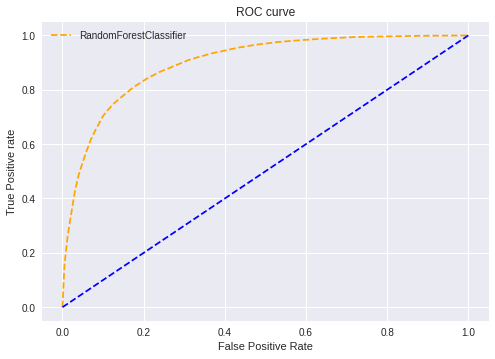

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
import joblib
joblib.dump(fianlRFC,"final model.pkl")

['final model.pkl']